# Final Assignment : Project Blind Search


## Goal
Find all injections and make statements about possibility of a real detection or false alarm.

## Guidance
1. You’ll be given one instance of data with known properties (tobs = 180.0, dt = 1/4096,
N = 180
dt , Sigma = 25.0) and an unknown number of injections with unknown parameters.
We have very little knowledge on our signal model, so we expect signals in the range of
f ∈ [10, 1000] Hz, φ ∈ [0, 2π] and A ∈ [0.5, 2], where A is the amplitude.
2. The data will likely have different (N, dt, Sigma) to your previous datasets, thus firstly
you have to determine a suitable setup. For this do the Monte-Carlo studies as in Exercise
3: Iteratively do multiple injections, search around a small box and notice the differences in
frequency, phase and the mismatch (df, dp, M ) i between these points and an optimal recovery
on-target.
3. After you have the list of (df, dp, M ) i , you can calculate with above parameter ranges the
total amount of templates N stage0 .
4. You have to do a runtime analysis. We saw there is a linear increase with number of templates,
so a few points with reasonable large template counts will suffice to get a good prediction.
After that you can calculate the predicted runtimes for the average mismatches and choose
the best found setup for a runtime you can afford to spend.
5. Now take a look at Exercise 1: Do Monte-Carlo studies to arrive at a ROC curve where you
can gain insight into your expected thresholds in terms of false negatives and true positives.
6. Choose threshold T c for follow-up and cluster all candidates above threshold. Since we deal
with only 2 parameters and we expect our recovery in phase to be very unsharp, we may
cluster only in frequency, that is define a start- and end-frequency f c,s , f c,e for each cluster.
Our follow-up stages search space will thus be the full φ ∈ [0, 2π] and the union of all cluster-
S
frequency-regions f ∈ (f c,s , f c,e ) in frequency. This is much smaller than our initial search
c
region.
7. Since we don’t have any more data and our refinement is probably maxed out, we note the
loudest candidate per cluster and determine with our ROC curve how probable a detection
is. Note the chance of false negatives and true positives.
8. Publish results: Prepare a document in which you give the necessary information:
(a) Each stages search setup (df, dp, Mismatch&Runtime)
(b) ROC curve
(c) Threshold used
(d) Properties of candidates above threshold (f, φ, ± errors): Please include a text file in
the following form: ”#Frequency FrequencyError Phase PhaseError” which will be used
to determine the amount of true positives and false negatives. For the errors just plot
images of each cluster and eyeball your errors.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import time

In [8]:
exe_dir = "/home/aswathy/DATA_ANALYSIS/datalab/code"
data_dir = "/home/aswathy/DATA_ANALYSIS/datalab/solutions/Final_Assignment/data"

In [3]:
"""
Usage: ./generate_source  [-h] [-o <file>] [-s <float>] [-d <float>] [-N <int>] [-f <float>] [-p <float>]
                          [-a <float>] [-r <int>]
  -o, --output=<file>       output file
  -s, --sigma=<float>       standard deviation sigma
  -d, --deltaT=<float>      delta T betwean measurements
  -N, --length=<int>        number of elements
  -f, --freq=<float>        frequency
  -p, --phase=<float>       phase
  -a, --amplitude=<float>   signal amplitude
  -r, --random=<int>        if set to 1, generate random signal
  -h, --help                print this help and exit
"""      

def generate_source(outputFile=None, sigma=0, f=0, A=0, delta_T=None, N=100000, phi=0, r=0):
    if delta_T == None : 
        delta_T = 1/N
       
    dataPath = os.path.join(data_dir, outputFile)
    exe_path = os.path.join(exe_dir, 'generate_source')
    cmd_str = f"{exe_path} -o {dataPath} -s {sigma} -d {delta_T} -N {N} -f {f} -p {phi} -a {A} -r {r}"
    
    #print(cmd_str)
    
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())

    return

In [4]:
"""
Usage: ./prober  [-h] [-i <file>] [-o <file>] [-f <float>] [-p <float>] [-t <file>] [-m <int>]
  -i, --input=<file>        input file
  -o, --output=<file>       output file
  -f, --freq=<float>        frequency
  -p, --phase=<float>       phase
  -h, --help                print this help and exit
  -t, --templatebank=<file> template bank file
  -m, --method=<int>        select method to analyze signal 1, 2 or 3
"""

def prober(inputFile, f=0, outputFile=None, phi=0, template=None, mod=0):
    
    exe_path = os.path.join(exe_dir, 'prober')
    cmd_str = f"{exe_path} -i {data_dir}/{inputFile} -o {data_dir}/{outputFile} -m {mod}"
    if template:
        cmd_str += f" -t {data_dir}/{template} "
    else:
        cmd_str += f" -f {f} -p {phi}"
        
    #print(cmd_str)
        
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        #print('The process has an output:', out.decode())
        return out.decode().split(' ')
    if os.path.isfile(outputFile):
        print(f"Output generated in file {outputFile}")

    return os.path.join(data_dir, outputFile)
    
    #if err:
        #print('The process raised an error:', err.decode())
    #if out:
        #print('The process has an output:', out.decode())
        
    #if out:
        #if template:
            #print('The process has an output:', out.decode())
        #else:
            #with open(f"{data_dir}/output_S{mod}.txt", "w") as file:
                #print('The process has an output:', out.decode())
                #file.write(out.decode())
                #return f"output_S{mod}.txt"
    #if mod == 3:
        #if template:
            #print(cmd_str)
        #else:
            #data = np.loadtxt(f"{data_dir}/{outputFile}")
            #with open(f"{data_dir}/output_S{mod}.txt", "w") as file:
                #file.write("{0: .1f}".format(data[f][0]) + " {0:.1f}".format(data[f][1]) + " {0:.1f}".format(data[f][2]))
                #file.write("{0}\n".format(data[f]))
                #return f"output_S{mod}.txt"
    
    #return f"output_S{mod}.txt"

# Calculating the Mismatch

In [114]:
#Define a function to calculate the Mismatch
def mismatch(iFile, resultsFile, tbank, mode, freq=0, p=0, nfrq=0, nphi=0):   
    
    #OFile_1 = prober(inputFile=iFile, f=freq, outputFile=resultsFile, phi=p, mod=mode)
    #prober(inputFile=iFile, outputFile=resultsFile, template=tbank, mod=mode)
    #results = np.loadtxt(os.path.join(data_dir, resultsFile))
    results_file = prober(inputFile=iFile, outputFile=resultsFile, template=tbank, mod=mode)
    results = np.loadtxt(results_file)
    
    
    if mode == 3:
        best = np.where(results[:,2] == np.max(results[:,2]))
        resultsf_tv = prober(inputFile=iFile, f=freq, outputFile=resultsFile, phi=p, mod=mode)
        results_tv = np.loadtxt(resultsf_tv)
        S_best = results[:,2][best][0]
        S_tv = np.max(results)
        M_i = 1 - (S_best/S_tv)
        print("Mismatch: ",M_i)
        print("\n")
        
        return M_i
    
    # Plot best match
    if mode == 1 :
        # For S_1 get the maximum value
        best_f, best_phi, best_val = results[np.argmax(results[:,2])]
        #data1 = np.loadtxt(os.path.join(data_dir, OFile_1))
        #tv_val = data1[2]
        tv_f, tv_phi, tv_val = prober(inputFile=iFile, f=freq, outputFile=resultsFile, phi=p, mod=mode)
        print("True value of frequency and phase: ", tv_f, tv_phi)
        print("Maximum Value at true f: ",tv_val)
        print("Best value of frequency and phase: ", best_f, best_phi)
        print("Maximum Value at best f: ",best_val)
        M_i = 1 - float(best_val)/float(tv_val)
    elif mode == 2: 
        # For S_2 get the minimum value
        best_f, best_phi, best_val = results[np.argmin(results[:,2])]
        #data1 = np.loadtxt(os.path.join(data_dir, OFile_1))
        #tv_val = data1[2]
        tv_f, tv_phi, tv_val = prober(inputFile=iFile, f=freq, outputFile=resultsFile, phi=p, mod=mode)
        print("True value of frequency and phase: ", tv_f, tv_phi)
        print("Minimum Value at true f: ",tv_val)
        print("Best value of frequency and phase: ", best_f, best_phi)
        print("Minimum Value at best f: ",best_val)
        M_i = 1 - abs(float(tv_val)-float(best_val)/float(tv_val))
        

       
    print("Mismatch: ",M_i)
    print("\n")
    
            
    return M_i

### Using parameters different to the given data files

In [107]:
data_files = []
nf = 101
frq = np.linspace(0.5, 100.5, nf)
ph = np.linspace(0, 2*np.pi, nf)
for n in range(nf):
    data_files.append(generate_source(f"data_sample_0{n}.csv",sigma=0.25, A=1, f=frq[n], phi=ph[n]))

True value of frequency and phase:  0.5 0
Maximum Value at true f:  0.500313

Best value of frequency and phase:  0.5 0.0
Maximum Value at best f:  0.500313
Mismatch:  0.0


True value of frequency and phase:  1.5 0.0628319
Maximum Value at true f:  0.499663

Best value of frequency and phase:  1.50334 0.0
Maximum Value at best f:  0.498354
Mismatch:  0.0026197657220966564


True value of frequency and phase:  2.5 0.125664
Maximum Value at true f:  0.499745

Best value of frequency and phase:  2.50669 0.0
Maximum Value at best f:  0.496369
Mismatch:  0.006755445277091265


True value of frequency and phase:  3.5 0.188496
Maximum Value at true f:  0.500727

Best value of frequency and phase:  3.51003 0.261799
Maximum Value at best f:  0.497365
Mismatch:  0.006714237498676945


True value of frequency and phase:  4.5 0.251327
Maximum Value at true f:  0.499392

Best value of frequency and phase:  4.51338 0.261799
Maximum Value at best f:  0.498032
Mismatch:  0.002723311546841023


True v

True value of frequency and phase:  41.5 2.57611
Maximum Value at true f:  0.499865

Best value of frequency and phase:  41.6371 2.0944
Maximum Value at best f:  0.483694
Mismatch:  0.03235073469836858


True value of frequency and phase:  42.5 2.63894
Maximum Value at true f:  0.499316

Best value of frequency and phase:  42.6405 2.0944
Maximum Value at best f:  0.480248
Mismatch:  0.0381882415143916


True value of frequency and phase:  43.5 2.70177
Maximum Value at true f:  0.500777

Best value of frequency and phase:  43.6438 2.35619
Maximum Value at best f:  0.48033
Mismatch:  0.040830549326347


True value of frequency and phase:  44.5 2.7646
Maximum Value at true f:  0.49984

Best value of frequency and phase:  44.6472 2.35619
Maximum Value at best f:  0.480932
Mismatch:  0.0378281049935979


True value of frequency and phase:  45.5 2.82743
Maximum Value at true f:  0.499674

Best value of frequency and phase:  45.6505 2.35619
Maximum Value at best f:  0.480617
Mismatch:  0.0381

True value of frequency and phase:  81.5 5.08938
Maximum Value at true f:  0.499326

Best value of frequency and phase:  81.4365 5.23599
Maximum Value at best f:  0.4952
Mismatch:  0.008263138710982387


True value of frequency and phase:  82.5 5.15221
Maximum Value at true f:  0.500463

Best value of frequency and phase:  82.4398 5.23599
Maximum Value at best f:  0.494563
Mismatch:  0.011789083308856085


True value of frequency and phase:  83.5 5.21504
Maximum Value at true f:  0.499697

Best value of frequency and phase:  83.4431 5.49779
Maximum Value at best f:  0.494274
Mismatch:  0.010852576661456892


True value of frequency and phase:  84.5 5.27788
Maximum Value at true f:  0.500236

Best value of frequency and phase:  84.4465 5.49779
Maximum Value at best f:  0.497107
Mismatch:  0.00625504761752449


True value of frequency and phase:  85.5 5.34071
Maximum Value at true f:  0.499112

Best value of frequency and phase:  85.4498 5.49779
Maximum Value at best f:  0.496969
Mismatc

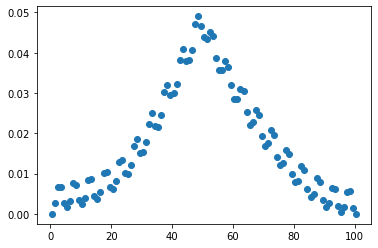

Total time required to complete the process: 37.06408003966013 minutes


In [108]:
start = time.time()

nfrq = 300
nphi = 25
frequency = np.linspace(0.5, 100.5, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))

values = []
m = 1
for n in range(nf):
    values.append(mismatch(f"data_sample_0{n}.csv", resultsFile=f"results_sample_0{n}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[n], p=ph[n]))
plt.scatter(frq,values)
plt.show()

end = time.time()
print("Total time required to complete the process:", (end-start)/60, "minutes")

True value of frequency and phase:  0.5 0
Minimum Value at true f:  0.0627715

Best value of frequency and phase:  0.5 0.0
Minimum Value at best f:  0.0627715
Mismatch:  0.06277149999999998


True value of frequency and phase:  1.5 0.0628319
Minimum Value at true f:  0.0626335

Best value of frequency and phase:  1.50334 0.0
Minimum Value at best f:  0.0641375
Mismatch:  0.03862079114611183


True value of frequency and phase:  2.5 0.125664
Minimum Value at true f:  0.0630595

Best value of frequency and phase:  2.50669 0.0
Minimum Value at best f:  0.0684784
Mismatch:  -0.022873626650226964


True value of frequency and phase:  3.5 0.188496
Minimum Value at true f:  0.0625775

Best value of frequency and phase:  3.51003 0.261799
Minimum Value at best f:  0.068114
Mismatch:  -0.025896791878071257


True value of frequency and phase:  4.5 0.251327
Minimum Value at true f:  0.0622475

Best value of frequency and phase:  4.51338 0.261799
Minimum Value at best f:  0.0637433
Mismatch:  0.03

True value of frequency and phase:  40.5 2.51327
Minimum Value at true f:  0.0623501

Best value of frequency and phase:  40.6338 2.0944
Minimum Value at best f:  0.0917943
Mismatch:  -0.40988971998425017


True value of frequency and phase:  41.5 2.57611
Minimum Value at true f:  0.0625571

Best value of frequency and phase:  41.6371 2.0944
Minimum Value at best f:  0.0944264
Mismatch:  -0.4468862725348519


True value of frequency and phase:  42.5 2.63894
Minimum Value at true f:  0.0627655

Best value of frequency and phase:  42.6405 2.0944
Minimum Value at best f:  0.100391
Mismatch:  -0.5366959876006723


True value of frequency and phase:  43.5 2.70177
Minimum Value at true f:  0.0626477

Best value of frequency and phase:  43.6438 2.35619
Minimum Value at best f:  0.102414
Mismatch:  -0.5721130334347471


True value of frequency and phase:  44.5 2.7646
Minimum Value at true f:  0.0629275

Best value of frequency and phase:  44.6472 2.35619
Minimum Value at best f:  0.0996125
Mis

True value of frequency and phase:  80.5 5.02655
Minimum Value at true f:  0.0625582

Best value of frequency and phase:  80.4331 5.23599
Minimum Value at best f:  0.0700723
Mismatch:  -0.057555550075929496


True value of frequency and phase:  81.5 5.08938
Minimum Value at true f:  0.0628113

Best value of frequency and phase:  81.4365 5.23599
Minimum Value at best f:  0.0707617
Mismatch:  -0.06376465050572122


True value of frequency and phase:  82.5 5.15221
Minimum Value at true f:  0.0620515

Best value of frequency and phase:  82.4398 5.23599
Minimum Value at best f:  0.073565
Mismatch:  -0.12349598877948176


True value of frequency and phase:  83.5 5.21504
Minimum Value at true f:  0.0625333

Best value of frequency and phase:  83.4431 5.49779
Minimum Value at best f:  0.0732576
Mismatch:  -0.1089641261713361


True value of frequency and phase:  84.5 5.27788
Minimum Value at true f:  0.0626602

Best value of frequency and phase:  84.4465 5.49779
Minimum Value at best f:  0.068

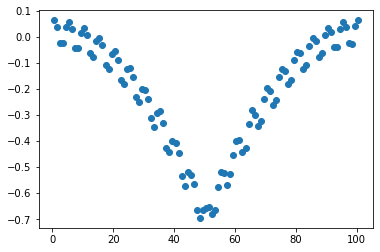

Total time required to complete the process:  76.49882380962372


In [112]:
start =time.time()

nfrq = 300
nphi = 25
frequency = np.linspace(0.5, 100.5, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))
        
values = []
m = 2
for n in range(nf):
    values.append(mismatch(f"data_sample_0{n}.csv", resultsFile=f"results_sample_0{n}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[n], p=ph[n]))
plt.scatter(frq,values)
plt.show()

end = time.time()
print("Total time required to complete the process: ", (end-start)/60, "minutes")

Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0


Mismatch:  0.0

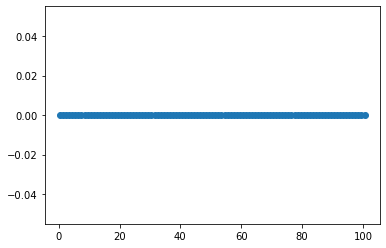

Total time required to complete the process:  3.0475140174229938 minutes


In [115]:
start =time.time()

nfrq = 300
nphi = 25
frequency = np.linspace(0.5, 100.5, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))
        
values = []
m = 3
for n in range(nf):
    values.append(mismatch(f"data_sample_0{n}.csv", resultsFile=f"results_sample_0{n}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[n], p=ph[n]))
plt.scatter(frq,values)
plt.show()

end = time.time()
print("Total time required to complete the process: ", (end-start)/60, "minutes")

True value of frequency and phase:  0.5 0
Maximum Value at true f:  0.500313

Best value of frequency and phase:  0.5 0.0
Maximum Value at best f:  0.500313
Mismatch:  0.0


True value of frequency and phase:  1.5 0.0628319
Maximum Value at true f:  0.499663

Best value of frequency and phase:  1.3016 0.641141
Maximum Value at best f:  0.500559
Mismatch:  -0.001793208622611564


True value of frequency and phase:  2.5 0.125664
Maximum Value at true f:  0.499745

Best value of frequency and phase:  2.50401 0.128228
Maximum Value at best f:  0.499274
Mismatch:  0.0009424806651392448


True value of frequency and phase:  3.5 0.188496
Maximum Value at true f:  0.500727

Best value of frequency and phase:  3.50601 0.128228
Maximum Value at best f:  0.499807
Mismatch:  0.001837328524325721


True value of frequency and phase:  4.5 0.251327
Maximum Value at true f:  0.499392

Best value of frequency and phase:  4.50802 0.256457
Maximum Value at best f:  0.498786
Mismatch:  0.00121347558631290

True value of frequency and phase:  40.5 2.51327
Maximum Value at true f:  0.500397

Best value of frequency and phase:  40.5802 2.30811
Maximum Value at best f:  0.494359
Mismatch:  0.012066419263105033


True value of frequency and phase:  41.5 2.57611
Maximum Value at true f:  0.499865

Best value of frequency and phase:  41.5822 2.30811
Maximum Value at best f:  0.494176
Mismatch:  0.011381072889680266


True value of frequency and phase:  42.5 2.63894
Maximum Value at true f:  0.499316

Best value of frequency and phase:  42.5842 2.43634
Maximum Value at best f:  0.492359
Mismatch:  0.013933060426663646


True value of frequency and phase:  43.5 2.70177
Maximum Value at true f:  0.500777

Best value of frequency and phase:  43.5862 2.43634
Maximum Value at best f:  0.494222
Mismatch:  0.013089658670426219


True value of frequency and phase:  44.5 2.7646
Maximum Value at true f:  0.49984

Best value of frequency and phase:  44.5882 2.43634
Maximum Value at best f:  0.49254
Mismatc

True value of frequency and phase:  80.5 5.02655
Maximum Value at true f:  0.500232

Best value of frequency and phase:  80.4599 5.12913
Maximum Value at best f:  0.49864
Mismatch:  0.0031825233091844485


True value of frequency and phase:  81.5 5.08938
Maximum Value at true f:  0.499326

Best value of frequency and phase:  81.4619 5.25736
Maximum Value at best f:  0.497452
Mismatch:  0.003753059123698721


True value of frequency and phase:  82.5 5.15221
Maximum Value at true f:  0.500463

Best value of frequency and phase:  82.4639 5.25736
Maximum Value at best f:  0.499267
Mismatch:  0.0023897870571849555


True value of frequency and phase:  83.5 5.21504
Maximum Value at true f:  0.499697

Best value of frequency and phase:  83.4659 5.38559
Maximum Value at best f:  0.497686
Mismatch:  0.004024438809918762


True value of frequency and phase:  84.5 5.27788
Maximum Value at true f:  0.500236

Best value of frequency and phase:  84.4679 5.38559
Maximum Value at best f:  0.499313
Mis

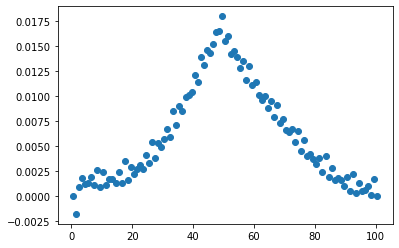

Total time required to complete the process: 122.9636975924174 minutes


In [109]:
start = time.time()

nfrq = 500
nphi = 50
frequency = np.linspace(0.5, 100.5, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))

values = []
m = 1
for n in range(nf):
    values.append(mismatch(f"data_sample_0{n}.csv", resultsFile=f"results_sample_0{n}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[n], p=ph[n]))
plt.scatter(frq,values)
plt.show()

end = time.time()
print("Total time required to complete the process:", (end-start)/60, "minutes")

True value of frequency and phase:  0.5 0
Minimum Value at true f:  0.0627715

Best value of frequency and phase:  0.5 0.0
Minimum Value at best f:  0.0627715
Mismatch:  0.06277149999999998


True value of frequency and phase:  1.5 0.0628319
Minimum Value at true f:  0.0626335

Best value of frequency and phase:  1.502 0.0
Minimum Value at best f:  0.0643628
Mismatch:  0.035023674587082


True value of frequency and phase:  2.5 0.125664
Minimum Value at true f:  0.0630595

Best value of frequency and phase:  2.50401 0.128228
Minimum Value at best f:  0.0632275
Mismatch:  0.06039534947549541


True value of frequency and phase:  3.5 0.188496
Minimum Value at true f:  0.0625775

Best value of frequency and phase:  3.50601 0.128228
Minimum Value at best f:  0.0635944
Mismatch:  0.04632725030961593


True value of frequency and phase:  4.5 0.251327
Minimum Value at true f:  0.0622475

Best value of frequency and phase:  4.50802 0.256457
Minimum Value at best f:  0.0626996
Mismatch:  0.0549

True value of frequency and phase:  40.5 2.51327
Minimum Value at true f:  0.0623501

Best value of frequency and phase:  40.5802 2.30811
Minimum Value at best f:  0.0740549
Mismatch:  -0.12537694454363368


True value of frequency and phase:  41.5 2.57611
Minimum Value at true f:  0.0625571

Best value of frequency and phase:  41.5822 2.30811
Minimum Value at best f:  0.0735467
Mismatch:  -0.11311600505122521


True value of frequency and phase:  42.5 2.63894
Minimum Value at true f:  0.0627655

Best value of frequency and phase:  42.5842 2.43634
Minimum Value at best f:  0.0760797
Mismatch:  -0.1493605883765763


True value of frequency and phase:  43.5 2.70177
Minimum Value at true f:  0.0626477

Best value of frequency and phase:  43.5862 2.43634
Minimum Value at best f:  0.0751471
Mismatch:  -0.13687119694274474


True value of frequency and phase:  44.5 2.7646
Minimum Value at true f:  0.0629275

Best value of frequency and phase:  44.5882 2.43634
Minimum Value at best f:  0.0769

True value of frequency and phase:  80.5 5.02655
Minimum Value at true f:  0.0625582

Best value of frequency and phase:  80.4599 5.12913
Minimum Value at best f:  0.0655412
Mismatch:  0.014874602965558426


True value of frequency and phase:  81.5 5.08938
Minimum Value at true f:  0.0628113

Best value of frequency and phase:  81.4619 5.25736
Minimum Value at best f:  0.0663948
Mismatch:  0.0057594637858154885


True value of frequency and phase:  82.5 5.15221
Minimum Value at true f:  0.0620515

Best value of frequency and phase:  82.4639 5.25736
Minimum Value at best f:  0.064304
Mismatch:  0.025751007667018544


True value of frequency and phase:  83.5 5.21504
Minimum Value at true f:  0.0625333

Best value of frequency and phase:  83.4659 5.38559
Minimum Value at best f:  0.0664642
Mismatch:  -0.00032760770837314546


True value of frequency and phase:  84.5 5.27788
Minimum Value at true f:  0.0626602

Best value of frequency and phase:  84.4679 5.38559
Minimum Value at best f:  0

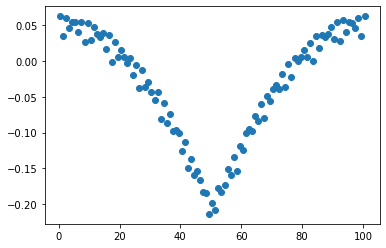

Total time required to complete the process:  254.15572305520377 minutes


In [116]:
start =time.time()

nfrq = 500
nphi = 50
frequency = np.linspace(0.5, 100.5, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))
        
values = []
m = 2
for n in range(nf):
    values.append(mismatch(f"data_sample_0{n}.csv", resultsFile=f"results_sample_0{n}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[n], p=ph[n]))
plt.scatter(frq,values)
plt.show()

end = time.time()
print("Total time required to complete the process: ", (end-start)/60, "minutes")

True value of frequency and phase:  0.5 0
Maximum Value at true f:  0.500313

Best value of frequency and phase:  0.5 0.0
Maximum Value at best f:  0.500313
Mismatch:  0.0


True value of frequency and phase:  1.5 0.0628319
Maximum Value at true f:  0.499663

Best value of frequency and phase:  1.4009 0.380799
Maximum Value at best f:  0.508321
Mismatch:  -0.017327678855548534


True value of frequency and phase:  2.5 0.125664
Maximum Value at true f:  0.499745

Best value of frequency and phase:  2.4019 0.444266
Maximum Value at best f:  0.501413
Mismatch:  -0.003337702228136452


True value of frequency and phase:  3.5 0.188496
Maximum Value at true f:  0.500727

Best value of frequency and phase:  3.503 0.1904
Maximum Value at best f:  0.500496
Mismatch:  0.00046132922730346415


True value of frequency and phase:  4.5 0.251327
Maximum Value at true f:  0.499392

Best value of frequency and phase:  4.504 0.253866
Maximum Value at best f:  0.499158
Mismatch:  0.00046856978085352274



True value of frequency and phase:  40.5 2.51327
Maximum Value at true f:  0.500397

Best value of frequency and phase:  40.54 2.41173
Maximum Value at best f:  0.498825
Mismatch:  0.0031415056445182055


True value of frequency and phase:  41.5 2.57611
Maximum Value at true f:  0.499865

Best value of frequency and phase:  41.541 2.47519
Maximum Value at best f:  0.498245
Mismatch:  0.003240875036259805


True value of frequency and phase:  42.5 2.63894
Maximum Value at true f:  0.499316

Best value of frequency and phase:  42.542 2.53866
Maximum Value at best f:  0.49751
Mismatch:  0.003616947984843244


True value of frequency and phase:  43.5 2.70177
Maximum Value at true f:  0.500777

Best value of frequency and phase:  43.543 2.53866
Maximum Value at best f:  0.498853
Mismatch:  0.003842029486178511


True value of frequency and phase:  44.5 2.7646
Maximum Value at true f:  0.49984

Best value of frequency and phase:  44.544 2.60213
Maximum Value at best f:  0.497953
Mismatch:  0

True value of frequency and phase:  80.5 5.02655
Maximum Value at true f:  0.500232

Best value of frequency and phase:  80.48 5.07732
Maximum Value at best f:  0.4998
Mismatch:  0.0008635992899294065


True value of frequency and phase:  81.5 5.08938
Maximum Value at true f:  0.499326

Best value of frequency and phase:  81.481 5.14079
Maximum Value at best f:  0.498976
Mismatch:  0.0007009448736897683


True value of frequency and phase:  82.5 5.15221
Maximum Value at true f:  0.500463

Best value of frequency and phase:  82.482 5.20425
Maximum Value at best f:  0.500135
Mismatch:  0.0006553931059838369


True value of frequency and phase:  83.5 5.21504
Maximum Value at true f:  0.499697

Best value of frequency and phase:  83.483 5.26772
Maximum Value at best f:  0.499419
Mismatch:  0.0005563371403070061


True value of frequency and phase:  84.5 5.27788
Maximum Value at true f:  0.500236

Best value of frequency and phase:  84.484 5.33119
Maximum Value at best f:  0.499985
Mismatch

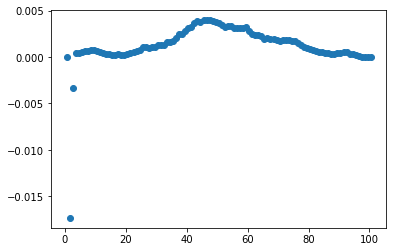

Total time required to complete the process: 491.14548820257187 minutes


In [110]:
start = time.time()

nfrq = 1000
nphi = 100
frequency = np.linspace(0.5, 100.5, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))

values = []
m = 1
for n in range(nf):
    values.append(mismatch(f"data_sample_0{n}.csv", resultsFile=f"results_sample_0{n}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[n], p=ph[n]))
plt.scatter(frq,values)
plt.show()

end = time.time()
print("Total time required to complete the process:", (end-start)/60, "minutes")

True value of frequency and phase:  0.5 0
Minimum Value at true f:  0.0627715

Best value of frequency and phase:  0.5 0.0
Minimum Value at best f:  0.0627715
Mismatch:  0.06277149999999998


True value of frequency and phase:  1.5 0.0628319
Minimum Value at true f:  0.0626335

Best value of frequency and phase:  1.501 0.0634665
Minimum Value at best f:  0.0626355
Mismatch:  0.06260156820631124


True value of frequency and phase:  2.5 0.125664
Minimum Value at true f:  0.0630595

Best value of frequency and phase:  2.502 0.126933
Minimum Value at best f:  0.0631059
Mismatch:  0.062323686997993955


True value of frequency and phase:  3.5 0.188496
Minimum Value at true f:  0.0625775

Best value of frequency and phase:  3.503 0.1904
Minimum Value at best f:  0.0626424
Mismatch:  0.06154038602133349


True value of frequency and phase:  4.5 0.251327
Minimum Value at true f:  0.0622475

Best value of frequency and phase:  4.504 0.253866
Minimum Value at best f:  0.0623282
Mismatch:  0.060

True value of frequency and phase:  40.5 2.51327
Minimum Value at true f:  0.0623501

Best value of frequency and phase:  40.54 2.41173
Minimum Value at best f:  0.0653249
Mismatch:  0.01463886938449166


True value of frequency and phase:  41.5 2.57611
Minimum Value at true f:  0.0625571

Best value of frequency and phase:  41.541 2.47519
Minimum Value at best f:  0.065569
Mismatch:  0.014410686563315789


True value of frequency and phase:  42.5 2.63894
Minimum Value at true f:  0.0627655

Best value of frequency and phase:  42.542 2.53866
Minimum Value at best f:  0.0660859
Mismatch:  0.009863826309835844


True value of frequency and phase:  43.5 2.70177
Minimum Value at true f:  0.0626477

Best value of frequency and phase:  43.543 2.53866
Minimum Value at best f:  0.0662031
Mismatch:  0.0058954169951969115


True value of frequency and phase:  44.5 2.7646
Minimum Value at true f:  0.0629275

Best value of frequency and phase:  44.544 2.60213
Minimum Value at best f:  0.0663591
Mi

True value of frequency and phase:  80.5 5.02655
Minimum Value at true f:  0.0625582

Best value of frequency and phase:  80.48 5.07732
Minimum Value at best f:  0.0633256
Mismatch:  0.05029122300897404


True value of frequency and phase:  81.5 5.08938
Minimum Value at true f:  0.0628113

Best value of frequency and phase:  81.481 5.14079
Minimum Value at best f:  0.0634258
Mismatch:  0.05302802851859456


True value of frequency and phase:  82.5 5.15221
Minimum Value at true f:  0.0620515

Best value of frequency and phase:  82.482 5.20425
Minimum Value at best f:  0.0626339
Mismatch:  0.052665747842517985


True value of frequency and phase:  83.5 5.21504
Minimum Value at true f:  0.0625333

Best value of frequency and phase:  83.483 5.26772
Minimum Value at best f:  0.0630298
Mismatch:  0.05459353030929137


True value of frequency and phase:  84.5 5.27788
Minimum Value at true f:  0.0626602

Best value of frequency and phase:  84.484 5.33119
Minimum Value at best f:  0.0631098
Mis

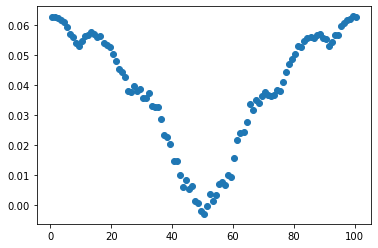

Total time required to complete the process:  1012.9918097217877 minutes


In [117]:
start =time.time()

nfrq = 1000
nphi = 100
frequency = np.linspace(0.5, 100.5, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))
        
values = []
m = 2
for n in range(nf):
    values.append(mismatch(f"data_sample_0{n}.csv", resultsFile=f"results_sample_0{n}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[n], p=ph[n]))
plt.scatter(frq,values)
plt.show()

end = time.time()
print("Total time required to complete the process: ", (end-start)/60, "minutes")

### Using parameters similar to the given data files

In [91]:
data_files = []
nf = 15
frq = np.linspace(10, 1000, nf)
ph = np.linspace(0, 2*np.pi, nf)
for n in range(nf):
    data_files.append(generate_source(f"data_test_0{n}.csv",sigma=25, A=1, f=frq[n], phi=ph[n], delta_T=1/4096, N=737280))

In [105]:
data_files = []
nf = 100
frq = np.linspace(10, 1000, nf)
ph = np.linspace(0, 2*np.pi, nf)
for n in range(nf):
    data_files.append(generate_source(f"data_test01_0{n}.csv",sigma=25, A=1, f=frq[n], phi=ph[n], delta_T=1/4096, N=737280))

In [92]:
#True values of frequency and phase
print(frq)
print(ph)

[  10.           80.71428571  151.42857143  222.14285714  292.85714286
  363.57142857  434.28571429  505.          575.71428571  646.42857143
  717.14285714  787.85714286  858.57142857  929.28571429 1000.        ]
[0.         0.44879895 0.8975979  1.34639685 1.7951958  2.24399475
 2.6927937  3.14159265 3.5903916  4.03919055 4.48798951 4.93678846
 5.38558741 5.83438636 6.28318531]


True value of frequency and phase:  0 10
Maximum Value at f:  0.475033

Best value of frequency and phase:  0.0 10.0
Mismatch:  0.0


True value of frequency and phase:  0.448799 80.7143
Maximum Value at f:  0.489255

Best value of frequency and phase:  1.0472 304.682
Mismatch:  0.8557623325259833


True value of frequency and phase:  0.897598 151.429
Maximum Value at f:  0.547633

Best value of frequency and phase:  3.92699 860.936
Mismatch:  0.8702716965559052


True value of frequency and phase:  1.3464 222.143
Maximum Value at f:  0.474964

Best value of frequency and phase:  1.8326 973.512
Mismatch:  0.8565173360507323


True value of frequency and phase:  1.7952 292.857
Maximum Value at f:  0.501238

Best value of frequency and phase:  3.14159 251.706
Mismatch:  0.8343856611031086


True value of frequency and phase:  2.24399 363.571
Maximum Value at f:  0.499795

Best value of frequency and phase:  5.75959 824.515
Mismatch:  0.8339016996968758


True value of frequency and phase

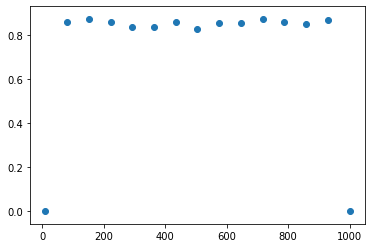

The total time required to complete the proces :  90.41839603185653 minutes


In [65]:
start = time.time()
nfrq = 300
nphi = 25
frequency = np.linspace(10, 1000, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))
        
values = []
m = 1
for n in range(nf):
    values.append(mismatch(f"data_test_0{n}.csv", resultsFile=f"results_test_0{n}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[n], p=ph[n]))
plt.scatter(frq,values)
plt.show()
end = time.time()
print("The total time required to complete the proces : ",(end-start)/60,"minutes" )

True value of frequency and phase:  10 0
Minimum Value at true f:  624.826

Best value of frequency and phase:  10.0 0.0
Minimum Value at best f:  624.826
Mismatch:  -622.826


True value of frequency and phase:  80.7143 0.448799
Minimum Value at true f:  625.067

Best value of frequency and phase:  619.231 2.0944
Minimum Value at best f:  625.937
Mismatch:  -623.0656081492065


True value of frequency and phase:  151.429 0.897598
Minimum Value at true f:  623.601

Best value of frequency and phase:  92.7759 5.23599
Minimum Value at best f:  624.464
Mismatch:  -621.5996161022833


True value of frequency and phase:  222.143 1.3464
Minimum Value at true f:  625.365

Best value of frequency and phase:  639.097 4.45059
Minimum Value at best f:  626.199
Mismatch:  -623.3636663788348


True value of frequency and phase:  292.857 1.7952
Minimum Value at true f:  625.504

Best value of frequency and phase:  1000.0 1.0472
Minimum Value at best f:  626.386
Mismatch:  -623.5025899370747


True v

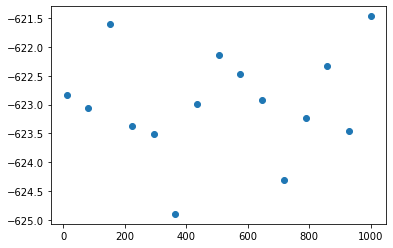

The total time required to complete the proces :  84.8291802684466 minutes


In [99]:
start = time.time()
nfrq = 300
nphi = 25
frequency = np.linspace(10, 1000, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))
        
values = []
m = 2
for n in range(nf):
    values.append(mismatch(f"data_test_0{n}.csv", resultsFile=f"results_test_0{n}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[n], p=ph[n]))
plt.scatter(frq,values)
plt.show()
end = time.time()
print("The total time required to complete the process : ",(end-start)/60,"minutes" )

True value of frequency and phase:  10 0
Minimum Value at true f:  623.432

Best value of frequency and phase:  10.0 0.0
Minimum Value at best f:  623.432
Mismatch:  -621.432


True value of frequency and phase:  20 0.0634665
Minimum Value at true f:  623.454

Best value of frequency and phase:  675.518 2.87979
Minimum Value at best f:  624.343
Mismatch:  -621.4525740728265


True value of frequency and phase:  30 0.126933
Minimum Value at true f:  626.781

Best value of frequency and phase:  715.251 1.5708
Minimum Value at best f:  627.595
Mismatch:  -624.7797013007732


True value of frequency and phase:  40 0.1904
Minimum Value at true f:  624.093

Best value of frequency and phase:  768.227 0.785398
Minimum Value at best f:  624.938
Mismatch:  -622.0916460351261


True value of frequency and phase:  50 0.253866
Minimum Value at true f:  624.818

Best value of frequency and phase:  483.478 5.23599
Minimum Value at best f:  625.723
Mismatch:  -622.8165515782196


True value of freque

True value of frequency and phase:  430 2.66559
Minimum Value at true f:  625.725

Best value of frequency and phase:  215.284 3.66519
Minimum Value at best f:  626.569
Mismatch:  -623.723651164649


True value of frequency and phase:  440 2.72906
Minimum Value at true f:  624.72

Best value of frequency and phase:  202.04 0.0
Minimum Value at best f:  625.597
Mismatch:  -622.7185961710846


True value of frequency and phase:  450 2.79253
Minimum Value at true f:  624.01

Best value of frequency and phase:  642.408 1.8326
Minimum Value at best f:  624.795
Mismatch:  -622.0087420073396


True value of frequency and phase:  460 2.85599
Minimum Value at true f:  625.284

Best value of frequency and phase:  761.605 5.49779
Minimum Value at best f:  626.147
Mismatch:  -623.2826198271505


True value of frequency and phase:  470 2.91946
Minimum Value at true f:  624.81

Best value of frequency and phase:  291.438 1.0472
Minimum Value at best f:  625.682
Mismatch:  -622.8086043757302


True v

True value of frequency and phase:  840 5.26772
Minimum Value at true f:  622.022

Best value of frequency and phase:  413.947 0.0
Minimum Value at best f:  622.924
Mismatch:  -620.0205498905184


True value of frequency and phase:  850 5.33119
Minimum Value at true f:  625.933

Best value of frequency and phase:  996.689 4.45059
Minimum Value at best f:  626.751
Mismatch:  -623.9316931508644


True value of frequency and phase:  860 5.39465
Minimum Value at true f:  626.412

Best value of frequency and phase:  569.565 3.40339
Minimum Value at best f:  627.254
Mismatch:  -624.4106558367337


True value of frequency and phase:  870 5.45812
Minimum Value at true f:  628.501

Best value of frequency and phase:  351.037 4.97419
Minimum Value at best f:  629.299
Mismatch:  -626.4997303122827


True value of frequency and phase:  880 5.52159
Minimum Value at true f:  625.29

Best value of frequency and phase:  834.448 1.309
Minimum Value at best f:  626.137
Mismatch:  -623.2886454285211


Tr

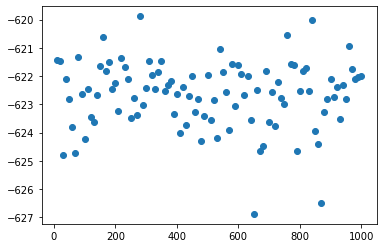

The total time required to complete the process :  566.8168663660686 minutes


In [106]:
start = time.time()
nfrq = 300
nphi = 25
frequency = np.linspace(10, 1000, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))
        
values = []
m = 2
for n in range(nf):
    values.append(mismatch(f"data_test01_0{n}.csv", resultsFile=f"results_test01_0{n}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[n], p=ph[n]))
plt.scatter(frq,values)
plt.show()
end = time.time()
print("The total time required to complete the process : ",(end-start)/60,"minutes" )

True value of frequency and phase:  0 10
Maximum Value at f:  0.475033

Best value of frequency and phase:  0.0 10.0
Mismatch:  0.0


True value of frequency and phase:  0.448799 80.7143
Maximum Value at f:  0.489255

Best value of frequency and phase:  6.28319 805.571
Mismatch:  0.8521658439872868


True value of frequency and phase:  0.897598 151.429
Maximum Value at f:  0.547633

Best value of frequency and phase:  1.15405 668.677
Mismatch:  0.8400867003997203


True value of frequency and phase:  1.3464 222.143
Maximum Value at f:  0.474964

Best value of frequency and phase:  3.46216 888.898
Mismatch:  0.8428796708803193


True value of frequency and phase:  1.7952 292.857
Maximum Value at f:  0.501238

Best value of frequency and phase:  5.77027 305.611
Mismatch:  0.8501388561920684


True value of frequency and phase:  2.24399 363.571
Maximum Value at f:  0.499795

Best value of frequency and phase:  2.43634 809.539
Mismatch:  0.840734301063436


True value of frequency and phas

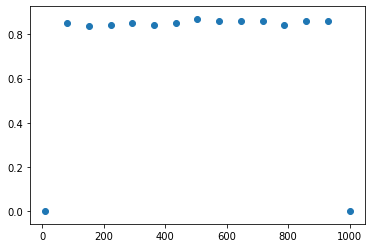

The total time required to complete the proces :  298.18897068103155 minutes


In [66]:
start = time.time()
nfrq = 500
nphi = 50
frequency = np.linspace(10, 1000, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))
        
values = []
m = 1
for n in range(nf):
    values.append(mismatch(f"data_test_0{n}.csv", resultsFile=f"results_test_0{n}_{nfrq}_{nphi}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[n], p=ph[n]))
plt.scatter(frq,values)
plt.show()
end = time.time()
print("The total time required to complete the proces : ",(end-start)/60,"minutes" )

data_test_00.csv
True value of frequency and phase:  10 0
Minimum Value at true f:  624.826

Best value of frequency and phase:  10.0 0.0
Minimum Value at best f:  624.826
Mismatch:  -622.826


data_test_01.csv
True value of frequency and phase:  80.7143 0.448799
Minimum Value at true f:  625.067

Best value of frequency and phase:  464.329 5.51382
Minimum Value at best f:  625.926
Mismatch:  -623.0656257473199


data_test_02.csv
True value of frequency and phase:  151.429 0.897598
Minimum Value at true f:  623.601

Best value of frequency and phase:  835.331 4.74445
Minimum Value at best f:  624.458
Mismatch:  -621.5996257238202


data_test_03.csv
True value of frequency and phase:  222.143 1.3464
Minimum Value at true f:  625.365

Best value of frequency and phase:  113.166 2.56457
Minimum Value at best f:  626.195
Mismatch:  -623.3636727750993


data_test_04.csv
True value of frequency and phase:  292.857 1.7952
Minimum Value at true f:  625.504

Best value of frequency and phase:  

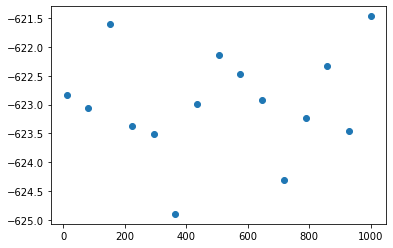

The total time required to complete the process :  284.5037281314532 minutes


In [103]:
start = time.time()
nfrq = 500
nphi = 50
frequency = np.linspace(10, 1000, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))
        
values = []
m = 2
for n in range(nf):
    print(f"data_test_0{n}.csv")
    values.append(mismatch(f"data_test_0{n}.csv", resultsFile=f"results_test_0{n}_{nfrq}_{nphi}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[n], p=ph[n]))
plt.scatter(frq,values)
plt.show()
end = time.time()
print("The total time required to complete the process : ",(end-start)/60,"minutes" )

True value of frequency and phase:  0 10
Maximum Value at f:  0.475033

Best value of frequency and phase:  0.0634665 10.0
Mismatch:  -0.001126237545602038


True value of frequency and phase:  0.448799 80.7143
Maximum Value at f:  0.489255

Best value of frequency and phase:  5.58505 885.045
Mismatch:  0.8377163237984282


True value of frequency and phase:  0.897598 151.429
Maximum Value at f:  0.547633

Best value of frequency and phase:  2.53866 472.793
Mismatch:  0.8592473426546611


True value of frequency and phase:  1.3464 222.143
Maximum Value at f:  0.474964

Best value of frequency and phase:  2.85599 233.964
Mismatch:  0.8452604828997566


True value of frequency and phase:  1.7952 292.857
Maximum Value at f:  0.501238

Best value of frequency and phase:  5.01385 282.523
Mismatch:  0.8406062589029563


True value of frequency and phase:  2.24399 363.571
Maximum Value at f:  0.499795

Best value of frequency and phase:  4.18879 737.387
Mismatch:  0.8200872357666643


True va

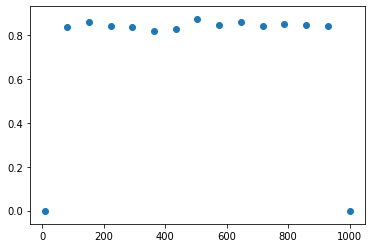

The total time required to complete the proces :  1180.1007868448894 minutes


In [10]:
start = time.time()
nfrq = 1000
nphi = 100
frequency = np.linspace(10, 1000, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))
        
values = []
m = 1
for n in range(nf):
    values.append(mismatch(f"data_test_0{n}.csv", resultsFile=f"results_test_0{n}_{nfrq}_{nphi}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[n], p=ph[n]))
plt.scatter(frq,values)
plt.show()
end = time.time()
print("The total time required to complete the proces : ",(end-start)/60,"minutes" )

True value of frequency and phase:  10 0
Minimum Value at true f:  624.826

Best value of frequency and phase:  10.0 0.0634665
Minimum Value at best f:  624.825
Mismatch:  -622.8260016004456


True value of frequency and phase:  80.7143 0.448799
Minimum Value at true f:  625.067

Best value of frequency and phase:  318.198 0.444266
Minimum Value at best f:  625.906
Mismatch:  -623.0656577438899


True value of frequency and phase:  151.429 0.897598
Minimum Value at true f:  623.601

Best value of frequency and phase:  572.883 1.1424
Minimum Value at best f:  624.427
Mismatch:  -621.5996754350939


True value of frequency and phase:  222.143 1.3464
Minimum Value at true f:  625.365

Best value of frequency and phase:  56.5766 3.10986
Minimum Value at best f:  626.187
Mismatch:  -623.3636855676285


True value of frequency and phase:  292.857 1.7952
Minimum Value at true f:  625.504

Best value of frequency and phase:  415.315 2.60213
Minimum Value at best f:  626.358
Mismatch:  -623.502

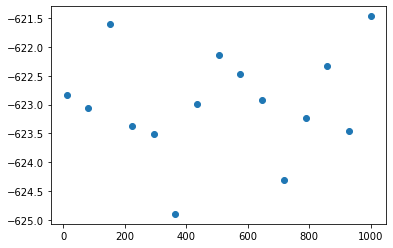

The total time required to complete the proces :  1134.1279776891072 minutes


In [104]:
start = time.time()
nfrq = 1000
nphi = 100
frequency = np.linspace(10, 1000, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))
        
values = []
m = 2
for n in range(nf):
    values.append(mismatch(f"data_test_0{n}.csv", resultsFile=f"results_test_0{n}_{nfrq}_{nphi}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[n], p=ph[n]))
plt.scatter(frq,values)
plt.show()
end = time.time()
print("The total time required to complete the proces : ",(end-start)/60,"minutes" )

#### It is obvious from the above results of the Mismatch function that I would require a much finer template bank than the highest configuration I have used (nfrq=1000 and nphi=100)

In [21]:
start = time.time()
nfrq = 5000
nphi = 500
frequency = np.linspace(10, 1000, nfrq)
phase = np.linspace(0, 2*np.pi, nphi)
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frequency[i], phase[j]))
        
m = 1
mismatch(f"data_test_02.csv", resultsFile=f"results_test_02_{nfrq}_{nphi}_S{m}.csv", tbank = f"temp_bank_{nfrq}_{nphi}.csv", mode=m, freq=frq[2], p=ph[2])

end = time.time()
print("The total time required to complete the proces : ",(end-start)/60,"minutes" )

True value of frequency and phase:  50.4082 0.256457
Maximum Value at true f:  0.489211


Best value of frequency and phase:  50.4001 1.90132
Maximum Value at best f:  0.118843
Mismatch:  0.7570721018129192
The total time required to complete the proces :  907.2324107368787 minutes


#### I tried a finer template and it takes about 15 hours for one file. From what I can see I would require an even finer template bank file to reduce the mismatch. Since I am running Linux on a virtual machine with bare minimum configurations; this task would take me too long to complete.

### Using prober on the given data files with different template bank files

In [22]:
m = 1
nfrq = 500
nphi = 50
frq = np.linspace(0.01, 1000.0, nfrq)
phi = np.linspace(0, 2*np.pi, nphi)

with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq[i], phi[j]))
            
for i in range(1,6):
    print(f"data_0{i}.csv")
    prober(f"data_0{i}.csv", outputFile=f"results_{i}_{nfrq}_{nphi}_S{m}.csv", template=f"temp_bank_{nfrq}_{nphi}.csv", mod=m)

data_01.csv
data_02.csv
data_03.csv
data_04.csv
data_05.csv


In [15]:
m = 1
nfrq = 1000
nphi = 100
frq = np.linspace(0.01, 1000.0, nfrq)
phi = np.linspace(0, 2*np.pi, nphi)

with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq[i], phi[j]))
            
for i in range(1,6):
    print(f"data_0{i}.csv")
    prober(f"data_0{i}.csv", outputFile=f"results_{i}_{nfrq}_{nphi}_S{m}.csv", template=f"temp_bank_{nfrq}_{nphi}.csv", mod=m)

data_01.csv
data_02.csv
data_03.csv
data_04.csv
data_05.csv


In [16]:
m = 1
nfrq = 2500
nphi = 500
frq = np.linspace(0.01, 1000.0, nfrq)
phi = np.linspace(0, 2*np.pi, nphi)

with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq[i], phi[j]))
            
for i in range(1,6):
    print(f"data_0{i}.csv")
    prober(f"data_0{i}.csv", outputFile=f"results_{i}_{nfrq}_{nphi}_S{m}.csv", template=f"temp_bank_{nfrq}_{nphi}.csv", mod=m)

data_01.csv
data_02.csv
data_03.csv
data_04.csv
data_05.csv


### Generating noise files with parameters similar to the given data files and using prober on the same files with different template bank files

In [30]:
for i in range(1,6):
    generate_source(f"noise_0{i}.csv",sigma=25, A=0, delta_T=1/4096, N=737280)

In [31]:
start = time.time()

m = 1
nfrq = 300
nphi = 25

for i in range(1,6):
    print(f"noise_0{i}.csv")
    prober(f"noise_0{i}.csv", outputFile=f"results_noise_{i}_{nfrq}_{nphi}_S{m}.csv", template=f"temp_bank_{nfrq}_{nphi}.csv", mod=1)

end = time.time()
print("The total time required to complete the proces : ",(end-start)/60,"minutes" )

noise_01.csv
noise_02.csv
noise_03.csv
noise_04.csv
noise_05.csv
The total time required to complete the proces :  29.78245923916499 minutes


In [32]:
start = time.time()

m = 1
nfrq = 500
nphi = 50

for i in range(1,6):
    print(f"noise_0{i}.csv")
    prober(f"noise_0{i}.csv", outputFile=f"results_noise_{i}_{nfrq}_{nphi}_S{m}.csv", template=f"temp_bank_{nfrq}_{nphi}.csv", mod=1)

end = time.time()
print("The total time required to complete the proces : ",(end-start)/60,"minutes" )

noise_01.csv
noise_02.csv
noise_03.csv
noise_04.csv
noise_05.csv
The total time required to complete the proces :  99.03901151021321 minutes


In [5]:
start = time.time()

m = 1
nfrq = 1000
nphi = 100

for i in range(1,6):
    print(f"noise_0{i}.csv")
    prober(f"noise_0{i}.csv", outputFile=f"results_noise_{i}_{nfrq}_{nphi}_S{m}.csv", template=f"temp_bank_{nfrq}_{nphi}.csv", mod=1)

end = time.time()
print("The total time required to complete the proces : ",(end-start)/60,"minutes" )


noise_01.csv
noise_02.csv
noise_03.csv
noise_04.csv
noise_05.csv
The total time required to complete the proces :  398.28897576332093 minutes


### Generating a ROC curve for sample data

In [65]:
#Create data files with parameters similar to the given data files
for i in range(200):
    #sigma=10
    generate_source(f"noise_ROC_{i}_sigma10.csv", sigma=10, delta_T=1/4096, N=737280)
    generate_source(f"signal_ROC_{i}_sigma10.csv", sigma=10, A=1, f=60, delta_T=1/4096, N=737280, phi=0)
    #sigma=25
    generate_source(f"noise_ROC_{i}_sigma25.csv", sigma=25, delta_T=1/4096, N=737280)
    generate_source(f"signal_ROC_{i}_sigma25.csv", sigma=25, A=1, f=60, delta_T=1/4096, N=737280, phi=0)

In [7]:
results_n_10_S1 = np.zeros(200)
results_s_10_S1 = np.zeros(200)
results_n_25_S1 = np.zeros(200)
results_s_25_S1 = np.zeros(200)


for i in range(200):
    print(f"noise_ROC_{i}_sigma10.csv")
    File3 = prober(f"noise_ROC_{i}_sigma10.csv", f=60, outputFile=f"results_noise_{i}_sigma10_S1.csv", phi=0, mod=1)
    data6 = np.loadtxt(File3)
    results_n_10_S1[i] = data6[2]    
    print(f"signal_ROC_{i}_sigma10.csv")
    File4 = prober(f"signal_ROC_{i}_sigma10.csv", f=60, outputFile=f"results_signal_{i}_sigma10_S1.csv", phi=0, mod=1)
    data7 = np.loadtxt(File4)
    results_s_10_S1[i] = data7[2] 
    
    print(f"noise_ROC_{i}_sigma25.csv")
    File5 = prober(f"noise_ROC_{i}_sigma25.csv", f=60, outputFile=f"results_noise_{i}_sigma25_S1.csv", phi=0, mod=1)
    data8 = np.loadtxt(File5)
    results_n_25_S1[i] = data8[2]    
    print(f"signal_ROC_{i}_sigma25.csv")
    File6 = prober(f"signal_ROC_{i}_sigma25.csv", f=60, outputFile=f"results_signal_{i}_sigma25_S1.csv", phi=0, mod=1)
    data9 = np.loadtxt(File6)
    results_s_25_S1[i] = data9[2] 

noise_ROC_0_sigma10.csv
signal_ROC_0_sigma10.csv
noise_ROC_0_sigma25.csv
signal_ROC_0_sigma25.csv
noise_ROC_1_sigma10.csv
signal_ROC_1_sigma10.csv
noise_ROC_1_sigma25.csv
signal_ROC_1_sigma25.csv
noise_ROC_2_sigma10.csv
signal_ROC_2_sigma10.csv
noise_ROC_2_sigma25.csv
signal_ROC_2_sigma25.csv
noise_ROC_3_sigma10.csv
signal_ROC_3_sigma10.csv
noise_ROC_3_sigma25.csv
signal_ROC_3_sigma25.csv
noise_ROC_4_sigma10.csv
signal_ROC_4_sigma10.csv
noise_ROC_4_sigma25.csv
signal_ROC_4_sigma25.csv
noise_ROC_5_sigma10.csv
signal_ROC_5_sigma10.csv
noise_ROC_5_sigma25.csv
signal_ROC_5_sigma25.csv
noise_ROC_6_sigma10.csv
signal_ROC_6_sigma10.csv
noise_ROC_6_sigma25.csv
signal_ROC_6_sigma25.csv
noise_ROC_7_sigma10.csv
signal_ROC_7_sigma10.csv
noise_ROC_7_sigma25.csv
signal_ROC_7_sigma25.csv
noise_ROC_8_sigma10.csv
signal_ROC_8_sigma10.csv
noise_ROC_8_sigma25.csv
signal_ROC_8_sigma25.csv
noise_ROC_9_sigma10.csv
signal_ROC_9_sigma10.csv
noise_ROC_9_sigma25.csv
signal_ROC_9_sigma25.csv
noise_ROC_10_sigma10

signal_ROC_80_sigma25.csv
noise_ROC_81_sigma10.csv
signal_ROC_81_sigma10.csv
noise_ROC_81_sigma25.csv
signal_ROC_81_sigma25.csv
noise_ROC_82_sigma10.csv
signal_ROC_82_sigma10.csv
noise_ROC_82_sigma25.csv
signal_ROC_82_sigma25.csv
noise_ROC_83_sigma10.csv
signal_ROC_83_sigma10.csv
noise_ROC_83_sigma25.csv
signal_ROC_83_sigma25.csv
noise_ROC_84_sigma10.csv
signal_ROC_84_sigma10.csv
noise_ROC_84_sigma25.csv
signal_ROC_84_sigma25.csv
noise_ROC_85_sigma10.csv
signal_ROC_85_sigma10.csv
noise_ROC_85_sigma25.csv
signal_ROC_85_sigma25.csv
noise_ROC_86_sigma10.csv
signal_ROC_86_sigma10.csv
noise_ROC_86_sigma25.csv
signal_ROC_86_sigma25.csv
noise_ROC_87_sigma10.csv
signal_ROC_87_sigma10.csv
noise_ROC_87_sigma25.csv
signal_ROC_87_sigma25.csv
noise_ROC_88_sigma10.csv
signal_ROC_88_sigma10.csv
noise_ROC_88_sigma25.csv
signal_ROC_88_sigma25.csv
noise_ROC_89_sigma10.csv
signal_ROC_89_sigma10.csv
noise_ROC_89_sigma25.csv
signal_ROC_89_sigma25.csv
noise_ROC_90_sigma10.csv
signal_ROC_90_sigma10.csv
noise

noise_ROC_159_sigma10.csv
signal_ROC_159_sigma10.csv
noise_ROC_159_sigma25.csv
signal_ROC_159_sigma25.csv
noise_ROC_160_sigma10.csv
signal_ROC_160_sigma10.csv
noise_ROC_160_sigma25.csv
signal_ROC_160_sigma25.csv
noise_ROC_161_sigma10.csv
signal_ROC_161_sigma10.csv
noise_ROC_161_sigma25.csv
signal_ROC_161_sigma25.csv
noise_ROC_162_sigma10.csv
signal_ROC_162_sigma10.csv
noise_ROC_162_sigma25.csv
signal_ROC_162_sigma25.csv
noise_ROC_163_sigma10.csv
signal_ROC_163_sigma10.csv
noise_ROC_163_sigma25.csv
signal_ROC_163_sigma25.csv
noise_ROC_164_sigma10.csv
signal_ROC_164_sigma10.csv
noise_ROC_164_sigma25.csv
signal_ROC_164_sigma25.csv
noise_ROC_165_sigma10.csv
signal_ROC_165_sigma10.csv
noise_ROC_165_sigma25.csv
signal_ROC_165_sigma25.csv
noise_ROC_166_sigma10.csv
signal_ROC_166_sigma10.csv
noise_ROC_166_sigma25.csv
signal_ROC_166_sigma25.csv
noise_ROC_167_sigma10.csv
signal_ROC_167_sigma10.csv
noise_ROC_167_sigma25.csv
signal_ROC_167_sigma25.csv
noise_ROC_168_sigma10.csv
signal_ROC_168_sigma

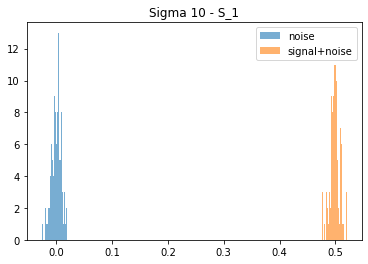

In [11]:
#Histogram for data files with sigma=10
plt.hist(results_n_10_S1, bins=50, alpha=0.6, label="noise")
plt.hist(results_s_10_S1, bins=50, alpha=0.6, label = "signal+noise")
plt.title("Sigma 10 - S_1")
plt.legend()
plt.show()
plt.close()

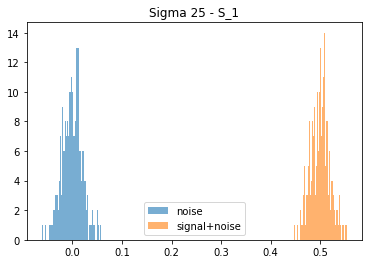

In [12]:
#Histogram for data files with sigma=25
plt.hist(results_n_25_S1, bins=50, alpha=0.6, label="noise")
plt.hist(results_s_25_S1, bins=50, alpha=0.6, label = "signal+noise")
plt.title("Sigma 25 - S_1")
plt.legend()
plt.show()
plt.close()

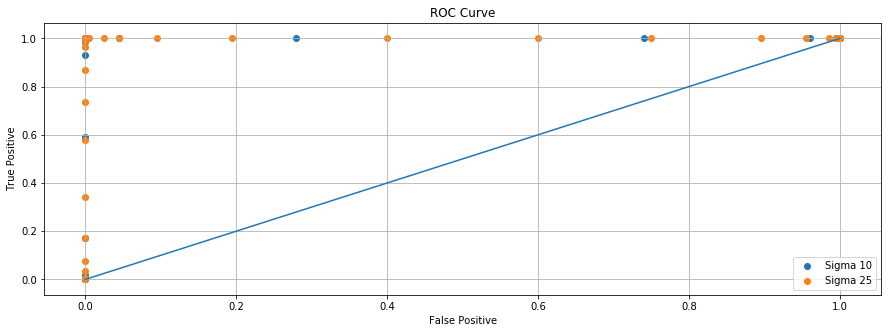

In [68]:
FP_10_S1 = []
TP_10_S1 = []
FP_25_S1 = []
TP_25_S1 = []

for t in np.linspace(-1,1,200):
    FP_10_S1 = np.append(FP_10_S1,len(np.where(results_n_10_S1 >= t)[0])/len(results_n_10_S1))
    TP_10_S1 = np.append(TP_10_S1,len(np.where(results_s_10_S1 >= t)[0])/len(results_s_10_S1)) 
    FP_25_S1 = np.append(FP_25_S1,len(np.where(results_n_25_S1 >= t)[0])/len(results_n_25_S1))
    TP_25_S1 = np.append(TP_25_S1,len(np.where(results_s_25_S1 >= t)[0])/len(results_s_25_S1))
    

plt.figure(figsize= (15,5))    
plt.scatter(FP_10_S1,TP_10_S1,label="Sigma 10")
plt.scatter(FP_25_S1,TP_25_S1,label="Sigma 25")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.plot([0,1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.grid()
plt.show()
plt.close()

In [10]:
results_n_10_S2 = np.zeros(200)
results_s_10_S2 = np.zeros(200)
results_n_25_S2 = np.zeros(200)
results_s_25_S2 = np.zeros(200)


for i in range(200):
    print(f"noise_ROC_{i}_sigma10.csv")
    File7 = prober(f"noise_ROC_{i}_sigma10.csv", f=60, outputFile=f"results_noise_{i}_sigma10_S2.csv", phi=0, mod=2)
    data10 = np.loadtxt(File7)
    results_n_10_S2[i] = data10[2]    
    print(f"signal_ROC_{i}_sigma10.csv")
    File8 = prober(f"signal_ROC_{i}_sigma10.csv", f=60, outputFile=f"results_signal_{i}_sigma10_S2.csv", phi=0, mod=2)
    data11 = np.loadtxt(File8)
    results_s_10_S2[i] = data11[2] 
    
    print(f"noise_ROC_{i}_sigma25.csv")
    File9 = prober(f"noise_ROC_{i}_sigma25.csv", f=60, outputFile=f"results_noise_{i}_sigma25_S2.csv", phi=0, mod=2)
    data12 = np.loadtxt(File9)
    results_n_25_S2[i] = data12[2]    
    print(f"signal_ROC_{i}_sigma25.csv")
    File10 = prober(f"signal_ROC_{i}_sigma25.csv", f=60, outputFile=f"results_signal_{i}_sigma25_S2.csv", phi=0, mod=2)
    data13 = np.loadtxt(File10)
    results_s_25_S2[i] = data13[2] 

noise_ROC_0_sigma10.csv
signal_ROC_0_sigma10.csv
noise_ROC_0_sigma25.csv
signal_ROC_0_sigma25.csv
noise_ROC_1_sigma10.csv
signal_ROC_1_sigma10.csv
noise_ROC_1_sigma25.csv
signal_ROC_1_sigma25.csv
noise_ROC_2_sigma10.csv
signal_ROC_2_sigma10.csv
noise_ROC_2_sigma25.csv
signal_ROC_2_sigma25.csv
noise_ROC_3_sigma10.csv
signal_ROC_3_sigma10.csv
noise_ROC_3_sigma25.csv
signal_ROC_3_sigma25.csv
noise_ROC_4_sigma10.csv
signal_ROC_4_sigma10.csv
noise_ROC_4_sigma25.csv
signal_ROC_4_sigma25.csv
noise_ROC_5_sigma10.csv
signal_ROC_5_sigma10.csv
noise_ROC_5_sigma25.csv
signal_ROC_5_sigma25.csv
noise_ROC_6_sigma10.csv
signal_ROC_6_sigma10.csv
noise_ROC_6_sigma25.csv
signal_ROC_6_sigma25.csv
noise_ROC_7_sigma10.csv
signal_ROC_7_sigma10.csv
noise_ROC_7_sigma25.csv
signal_ROC_7_sigma25.csv
noise_ROC_8_sigma10.csv
signal_ROC_8_sigma10.csv
noise_ROC_8_sigma25.csv
signal_ROC_8_sigma25.csv
noise_ROC_9_sigma10.csv
signal_ROC_9_sigma10.csv
noise_ROC_9_sigma25.csv
signal_ROC_9_sigma25.csv
noise_ROC_10_sigma10

signal_ROC_80_sigma25.csv
noise_ROC_81_sigma10.csv
signal_ROC_81_sigma10.csv
noise_ROC_81_sigma25.csv
signal_ROC_81_sigma25.csv
noise_ROC_82_sigma10.csv
signal_ROC_82_sigma10.csv
noise_ROC_82_sigma25.csv
signal_ROC_82_sigma25.csv
noise_ROC_83_sigma10.csv
signal_ROC_83_sigma10.csv
noise_ROC_83_sigma25.csv
signal_ROC_83_sigma25.csv
noise_ROC_84_sigma10.csv
signal_ROC_84_sigma10.csv
noise_ROC_84_sigma25.csv
signal_ROC_84_sigma25.csv
noise_ROC_85_sigma10.csv
signal_ROC_85_sigma10.csv
noise_ROC_85_sigma25.csv
signal_ROC_85_sigma25.csv
noise_ROC_86_sigma10.csv
signal_ROC_86_sigma10.csv
noise_ROC_86_sigma25.csv
signal_ROC_86_sigma25.csv
noise_ROC_87_sigma10.csv
signal_ROC_87_sigma10.csv
noise_ROC_87_sigma25.csv
signal_ROC_87_sigma25.csv
noise_ROC_88_sigma10.csv
signal_ROC_88_sigma10.csv
noise_ROC_88_sigma25.csv
signal_ROC_88_sigma25.csv
noise_ROC_89_sigma10.csv
signal_ROC_89_sigma10.csv
noise_ROC_89_sigma25.csv
signal_ROC_89_sigma25.csv
noise_ROC_90_sigma10.csv
signal_ROC_90_sigma10.csv
noise

noise_ROC_159_sigma10.csv
signal_ROC_159_sigma10.csv
noise_ROC_159_sigma25.csv
signal_ROC_159_sigma25.csv
noise_ROC_160_sigma10.csv
signal_ROC_160_sigma10.csv
noise_ROC_160_sigma25.csv
signal_ROC_160_sigma25.csv
noise_ROC_161_sigma10.csv
signal_ROC_161_sigma10.csv
noise_ROC_161_sigma25.csv
signal_ROC_161_sigma25.csv
noise_ROC_162_sigma10.csv
signal_ROC_162_sigma10.csv
noise_ROC_162_sigma25.csv
signal_ROC_162_sigma25.csv
noise_ROC_163_sigma10.csv
signal_ROC_163_sigma10.csv
noise_ROC_163_sigma25.csv
signal_ROC_163_sigma25.csv
noise_ROC_164_sigma10.csv
signal_ROC_164_sigma10.csv
noise_ROC_164_sigma25.csv
signal_ROC_164_sigma25.csv
noise_ROC_165_sigma10.csv
signal_ROC_165_sigma10.csv
noise_ROC_165_sigma25.csv
signal_ROC_165_sigma25.csv
noise_ROC_166_sigma10.csv
signal_ROC_166_sigma10.csv
noise_ROC_166_sigma25.csv
signal_ROC_166_sigma25.csv
noise_ROC_167_sigma10.csv
signal_ROC_167_sigma10.csv
noise_ROC_167_sigma25.csv
signal_ROC_167_sigma25.csv
noise_ROC_168_sigma10.csv
signal_ROC_168_sigma

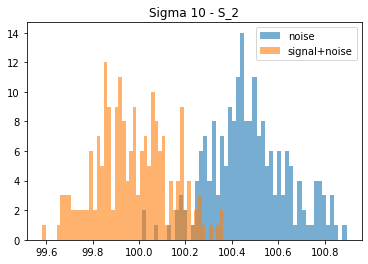

In [14]:
plt.hist(results_n_10_S2, bins=50, alpha=0.6, label="noise")
plt.hist(results_s_10_S2, bins=50, alpha=0.6, label = "signal+noise")
plt.title("Sigma 10 - S_2")
plt.legend()
plt.show()
plt.close()

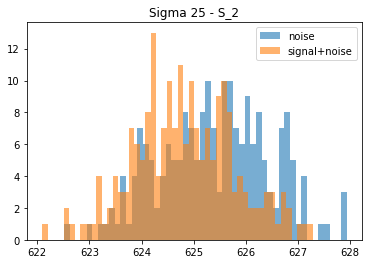

In [15]:
plt.hist(results_n_25_S2, bins=50, alpha=0.6, label="noise")
plt.hist(results_s_25_S2, bins=50, alpha=0.6, label = "signal+noise")
plt.title("Sigma 25 - S_2")
plt.legend()
plt.show()
plt.close()

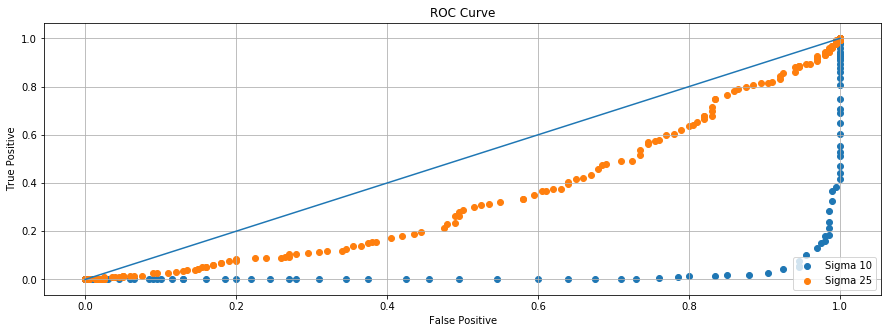

In [67]:
FP_10_S2= []
TP_10_S2 = []
FP_25_S2 = []
TP_25_S2 = []

for t_10 in np.linspace(99,102,200):
    FP_10_S2 = np.append(FP_10_S2,len(np.where(results_n_10_S2 >= t_10)[0])/len(results_n_10_S2))
    TP_10_S2 = np.append(TP_10_S2,len(np.where(results_s_10_S2 >= t_10)[0])/len(results_s_10_S2))
    
for t_25 in np.linspace(622,628,200):
    FP_25_S2 = np.append(FP_25_S2,len(np.where(results_n_25_S2 >= t_25)[0])/len(results_n_25_S2))
    TP_25_S2 = np.append(TP_25_S2,len(np.where(results_s_25_S2 >= t_25)[0])/len(results_s_25_S2))
    

plt.figure(figsize= (15,5))    
plt.scatter(FP_10_S2,TP_10_S2,label="Sigma 10")
plt.scatter(FP_25_S2,TP_25_S2,label="Sigma 25")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.plot([0,1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.grid()
plt.show()
plt.close()

In [17]:
#Define a function to caluculate the maximum values of S, frequency and phase above the threshold t
def find_parameter(inFile,outFile,tbank,t,mode):
    #prober(inputFile=inFile, outputFile=outFile, template=tbank, mod=mode)
    data = np.loadtxt(os.path.join(data_dir, outFile))
    
    if mode == 2:
        best = np.where(data[:,2] == np.min(data[:,2]))
        s = data[:,2]
        s_best = data[:,2][best][0]
        if s_best >= t:
            print("Minimum value is at f = {0:.3f}Hz".format(data[:,0][best][0]))
            print("Minimum value is at phi = {0:.3f}".format(data[:,1][best][0]))
            print("Minimum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
            print("The value of S is >= the threshold",len(np.where(s >= t)[0]),"times.")
            print(data[np.where(s >= t)[0]])
            print("\n")
            result = "positive"
        elif s_best < t:
            print("Signal is not detected")
            print("Minimum is at f = {0:.3f}Hz".format(data[:,0][best][0]))
            print("Minimum is at p = {0:.3f}".format(data[:,1][best][0]))
            print("Minimum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
            print("\n")
            result = "negative"
    else:
        best = np.where(data[:,2] == np.max(data[:,2]))
        s = data[:,2]
        s_best = data[:,2][best][0]
        if s_best >= t:
            print("Signal is detected")
            print("Signal is present at f = {0:.3f}Hz".format(data[:,0][best][0]))
            print("Signal is present at p = {0:.3f}".format(data[:,1][best][0]))
            print("Maximum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
            print("The value of S is >= the threshold",len(np.where(s >= t)[0]),"times.")
            print(data[np.where(s >= t)[0]])
            #print(data[np.where(s >= t)[0]][:,0])
            print("\n")
            result = "positive"
        elif s_best < t:
            print("Signal is not detected")
            print("Maximum is at f = {0:.3f}Hz".format(data[:,0][best][0]))
            print("Maximum is at p = {0:.3f}".format(data[:,1][best][0]))
            print("Maximum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
            print("\n")
            result = "negative"
            
    return result, s_best

### Splitting the total frequency range into 10 and probing the data files using the different templete banks

In [81]:
nfrq = 1000
nphi = 100

frq1 = np.linspace(0.0, 100.0, nfrq)
frq2 = np.linspace(100.0, 200.0, nfrq)
frq3 = np.linspace(200.0, 300.0, nfrq)
frq4 = np.linspace(300.0, 400.0, nfrq)
frq5 = np.linspace(400.0, 500.0, nfrq)
frq6 = np.linspace(500.0, 600.0, nfrq)
frq7 = np.linspace(600.0, 700.0, nfrq)
frq8 = np.linspace(700.0, 800.0, nfrq)
frq9 = np.linspace(800.0, 900.0, nfrq)
frq10 = np.linspace(900.0, 1000.0, nfrq)
phi = np.linspace(0, 2*np.pi, nphi)

with open(f"{data_dir}/temp_bank_0-100_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq1[i], phi[j]))

with open(f"{data_dir}/temp_bank_100-200_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq2[i], phi[j]))
            
with open(f"{data_dir}/temp_bank_200-300_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq3[i], phi[j]))
            
with open(f"{data_dir}/temp_bank_300-400_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq4[i], phi[j]))
            
with open(f"{data_dir}/temp_bank_400-500_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq5[i], phi[j]))
            
with open(f"{data_dir}/temp_bank_500-600_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq6[i], phi[j]))
            
with open(f"{data_dir}/temp_bank_600-700_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq7[i], phi[j]))
            
with open(f"{data_dir}/temp_bank_700-800_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq8[i], phi[j]))
            
with open(f"{data_dir}/temp_bank_800-900_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq9[i], phi[j]))
            
with open(f"{data_dir}/temp_bank_900-1000_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq10[i], phi[j]))



In [18]:
start = time.time()

prober(f"data_01.csv", outputFile=f"prober_results_data01_000-100_{nfrq}_{nphi}_S1.csv", template=f"temp_bank_0-100_{nfrq}_{nphi}.csv", mod=1) 
prober(f"data_01.csv", outputFile=f"prober_results_data01_100-200_{nfrq}_{nphi}_S1.csv", template=f"temp_bank_100-200_{nfrq}_{nphi}.csv", mod=1) 
prober(f"data_01.csv", outputFile=f"prober_results_data01_200-300_{nfrq}_{nphi}_S1.csv", template=f"temp_bank_200-300_{nfrq}_{nphi}.csv", mod=1) 
prober(f"data_01.csv", outputFile=f"prober_results_data01_300-400_{nfrq}_{nphi}_S1.csv", template=f"temp_bank_300-400_{nfrq}_{nphi}.csv", mod=1) 
prober(f"data_01.csv", outputFile=f"prober_results_data01_400-500_{nfrq}_{nphi}_S1.csv", template=f"temp_bank_400-500_{nfrq}_{nphi}.csv", mod=1) 
prober(f"data_01.csv", outputFile=f"prober_results_data01_500-600_{nfrq}_{nphi}_S1.csv", template=f"temp_bank_500-600_{nfrq}_{nphi}.csv", mod=1) 
prober(f"data_01.csv", outputFile=f"prober_results_data01_600-700_{nfrq}_{nphi}_S1.csv", template=f"temp_bank_600-700_{nfrq}_{nphi}.csv", mod=1) 
prober(f"data_01.csv", outputFile=f"prober_results_data01_700-800_{nfrq}_{nphi}_S1.csv", template=f"temp_bank_700-800_{nfrq}_{nphi}.csv", mod=1) 
prober(f"data_01.csv", outputFile=f"prober_results_data01_800-900_{nfrq}_{nphi}_S1.csv", template=f"temp_bank_800-900_{nfrq}_{nphi}.csv", mod=1) 
prober(f"data_01.csv", outputFile=f"prober_results_data01_900-1000_{nfrq}_{nphi}_S1.csv", template=f"temp_bank_900-1000_{nfrq}_{nphi}.csv", mod=1) 


end = time.time()
print("The total time take to complete the process: ", (end-start)/60)


The total time take to complete the process:  752.0483401735623 minutes


In [26]:
for i in range(1,6):
    print(f"data_0{i}.csv")
    for k in range(10):
        data = np.loadtxt(os.path.join(data_dir, f"prober_results_data0{i}_{k}00-{k+1}00_1000_100_S1.csv"))
        best = np.where(data[:,2] == np.max(data[:,2]))
        print(f"prober_results_data0{i}_{k}00-{k+1}00_1000_100_S1.csv")
        print("Value of f at maximum S = {0:.3f}Hz".format(data[:,0][best][0]))
        print("Value of p at maximum S = {0:.3f}".format(data[:,1][best][0]))
        print("Maximum Value of S = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
        print("\n")

data_01.csv
prober_results_data01_000-100_1000_100_S1.csv
Value of f at maximum S = 57.958Hz
Value of p at maximum S = 3.681
Maximum Value of S = 0.090 (0.08982260)


prober_results_data01_100-200_1000_100_S1.csv
Value of f at maximum S = 169.670Hz
Value of p at maximum S = 3.300
Maximum Value of S = 0.084 (0.08356840)


prober_results_data01_200-300_1000_100_S1.csv
Value of f at maximum S = 241.241Hz
Value of p at maximum S = 2.285
Maximum Value of S = 0.076 (0.07565590)


prober_results_data01_300-400_1000_100_S1.csv
Value of f at maximum S = 320.521Hz
Value of p at maximum S = 6.220
Maximum Value of S = 0.079 (0.07940130)


prober_results_data01_400-500_1000_100_S1.csv
Value of f at maximum S = 433.233Hz
Value of p at maximum S = 3.237
Maximum Value of S = 0.070 (0.07042620)


prober_results_data01_500-600_1000_100_S1.csv
Value of f at maximum S = 593.994Hz
Value of p at maximum S = 3.491
Maximum Value of S = 0.082 (0.08160630)


prober_results_data01_600-700_1000_100_S1.csv
Value o

In [19]:
s_list_signal = []
s_all_signal = []

number_of_files = 0

nfrq = 1000
nphi = 100
#frq = np.linspace(0.0, 1000.0, nfrq)
#phi = np.linspace(0, 2*np.pi, nphi)

#with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    #for i in range(nfrq):
        #for j in range(nphi):
            #file.write("{0} {1}\n".format(frq[i], phi[j]))

for i in range(1,6):
    print(f"data_0{i}.csv")
    for k in range(10):
        print(f"prober_results_data0{i}_{k}00-{k+1}00_1000_100_S1.csv")
        result, s_value = find_parameter(inFile=f"data_0{i}.csv", outFile=f"prober_results_data0{i}_{k}00-{k+1}00_1000_100_S1.csv", tbank=f"temp_bank_{nfrq}_{nphi}.csv", mode=1, t=0.08)
        if result == "positive":
            s_list_signal = np.append(s_list_signal,s_value)
            number_of_files = number_of_files + 1
        s_all_signal = np.append(s_all_signal,s_value)

print(s_list_signal)
print("Number of files where a signal is present:",number_of_files)

data_01.csv
prober_results_data01_000-100_1000_100_S1.csv
Signal is detected
Signal is present at f = 57.958Hz
Signal is present at p = 3.681
Maximum Value       = 0.090 (0.08982260)
The value of S is >= the threshold 18 times.
[[49.4494     1.07893    0.0801139]
 [49.4494     1.1424     0.0803945]
 [49.4494     1.20586    0.0803525]
 [57.958      3.23679    0.0808695]
 [57.958      3.30026    0.0831864]
 [57.958      3.36373    0.0851684]
 [57.958      3.42719    0.0868076]
 [57.958      3.49066    0.0880955]
 [57.958      3.55413    0.0890329]
 [57.958      3.61759    0.0896079]
 [57.958      3.68106    0.0898226]
 [57.958      3.74452    0.0896739]
 [57.958      3.80799    0.0891697]
 [57.958      3.87146    0.0883034]
 [57.958      3.93492    0.0870821]
 [57.958      3.99839    0.085505 ]
 [57.958      4.06186    0.0835916]
 [57.958      4.12532    0.0813371]]


prober_results_data01_100-200_1000_100_S1.csv
Signal is detected
Signal is present at f = 169.670Hz
Signal is present at 

Signal is not detected
Maximum is at f = 786.687Hz
Maximum is at p = 4.823
Maximum Value       = 0.074 (0.07376320)


prober_results_data03_800-900_1000_100_S1.csv
Signal is not detected
Maximum is at f = 843.143Hz
Maximum is at p = 2.729
Maximum Value       = 0.073 (0.07330170)


prober_results_data03_900-1000_1000_100_S1.csv
Signal is detected
Signal is present at f = 911.211Hz
Signal is present at p = 5.331
Maximum Value       = 0.084 (0.08426830)
The value of S is >= the threshold 10 times.
[[9.11211e+02 5.01385e+00 8.08548e-02]
 [9.11211e+02 5.07732e+00 8.22059e-02]
 [9.11211e+02 5.14079e+00 8.32270e-02]
 [9.11211e+02 5.20425e+00 8.39132e-02]
 [9.11211e+02 5.26772e+00 8.42582e-02]
 [9.11211e+02 5.33119e+00 8.42683e-02]
 [9.11211e+02 5.39465e+00 8.39353e-02]
 [9.11211e+02 5.45812e+00 8.32673e-02]
 [9.11211e+02 5.52159e+00 8.22622e-02]
 [9.11211e+02 5.58505e+00 8.09272e-02]]


data_04.csv
prober_results_data04_000-100_1000_100_S1.csv
Signal is detected
Signal is present at f = 7.608

Signal is not detected
Maximum is at f = 598.999Hz
Maximum is at p = 1.079
Maximum Value       = 0.076 (0.07644590)


prober_results_data05_600-700_1000_100_S1.csv
Signal is not detected
Maximum is at f = 623.023Hz
Maximum is at p = 5.141
Maximum Value       = 0.076 (0.07553660)


prober_results_data05_700-800_1000_100_S1.csv
Signal is detected
Signal is present at f = 791.291Hz
Signal is present at p = 4.506
Maximum Value       = 0.087 (0.08747210)
The value of S is >= the threshold 21 times.
[[7.46847e+02 4.82346e+00 8.07165e-02]
 [7.46847e+02 4.88692e+00 8.11693e-02]
 [7.46847e+02 4.95039e+00 8.12961e-02]
 [7.46847e+02 5.01385e+00 8.10968e-02]
 [7.46847e+02 5.07732e+00 8.05694e-02]
 [7.87487e+02 1.20586e+00 8.00039e-02]
 [7.87487e+02 1.26933e+00 8.03208e-02]
 [7.87487e+02 1.33280e+00 8.03109e-02]
 [7.91291e+02 4.12532e+00 8.12270e-02]
 [7.91291e+02 4.18879e+00 8.31208e-02]
 [7.91291e+02 4.25226e+00 8.46812e-02]
 [7.91291e+02 4.31572e+00 8.59022e-02]
 [7.91291e+02 4.37919e+00 8.67741

In [20]:
s_list_noise = []
s_all_noise = []

number_of_files = 0

nfrq = 1000
nphi = 100
#frq = np.linspace(0.0, 1000.0, nfrq)
#phi = np.linspace(0, 2*np.pi, nphi)

#with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    #for i in range(nfrq):
        #for j in range(nphi):
            #file.write("{0} {1}\n".format(frq[i], phi[j]))

for i in range(1,6):
    print(f"noise_0{i}.csv")
    for k in range(10):
        print(f"prober_results_noise0{i}_{k}00-{k+1}00_1000_100_S1.csv")
        result, s_value = find_parameter(inFile=f"noise_0{i}.csv", outFile=f"prober_results_noise0{i}_{k}00-{k+1}00_1000_100_S1.csv", tbank=f"temp_bank_{nfrq}_{nphi}.csv", mode=1, t=0.08)
        if result == "positive":
            s_list_noise = np.append(s_list_noise,s_value)
            number_of_files = number_of_files + 1
        s_all_noise = np.append(s_all_noise,s_value)

print(s_list_noise)
print("Number of files where a signal is present:",number_of_files)

noise_01.csv
prober_results_noise01_000-100_1000_100_S1.csv
Signal is detected
Signal is present at f = 36.637Hz
Signal is present at p = 0.381
Maximum Value       = 0.085 (0.08483390)
The value of S is >= the threshold 11 times.
[[36.6366     0.0634665  0.0806409]
 [36.6366     0.126933   0.0821524]
 [36.6366     0.1904     0.083329 ]
 [36.6366     0.253866   0.0841684]
 [36.6366     0.317333   0.0846723]
 [36.6366     0.380799   0.0848339]
 [36.6366     0.444266   0.0846555]
 [36.6366     0.507732   0.0841345]
 [36.6366     0.571199   0.0832744]
 [36.6366     0.634665   0.0820798]
 [36.6366     0.698132   0.0805556]]


prober_results_noise01_100-200_1000_100_S1.csv
Signal is detected
Signal is present at f = 121.021Hz
Signal is present at p = 1.396
Maximum Value       = 0.080 (0.08044320)
The value of S is >= the threshold 4 times.
[[1.21021e+02 1.26933e+00 8.00168e-02]
 [1.21021e+02 1.33280e+00 8.03921e-02]
 [1.21021e+02 1.39626e+00 8.04432e-02]
 [1.21021e+02 1.45973e+00 8.01688e-02

Signal is not detected
Maximum is at f = 626.727Hz
Maximum is at p = 0.698
Maximum Value       = 0.080 (0.07964810)


prober_results_noise03_700-800_1000_100_S1.csv
Signal is not detected
Maximum is at f = 739.239Hz
Maximum is at p = 0.190
Maximum Value       = 0.072 (0.07198800)


prober_results_noise03_800-900_1000_100_S1.csv
Signal is not detected
Maximum is at f = 847.147Hz
Maximum is at p = 0.952
Maximum Value       = 0.079 (0.07933140)


prober_results_noise03_900-1000_1000_100_S1.csv
Signal is detected
Signal is present at f = 942.142Hz
Signal is present at p = 0.317
Maximum Value       = 0.088 (0.08779520)
The value of S is >= the threshold 14 times.
[[9.42142e+02 0.00000e+00 8.38621e-02]
 [9.42142e+02 6.34665e-02 8.53439e-02]
 [9.42142e+02 1.26933e-01 8.64820e-02]
 [9.42142e+02 1.90400e-01 8.72728e-02]
 [9.42142e+02 2.53866e-01 8.77087e-02]
 [9.42142e+02 3.17333e-01 8.77952e-02]
 [9.42142e+02 3.80799e-01 8.75276e-02]
 [9.42142e+02 4.44266e-01 8.69054e-02]
 [9.42142e+02 5.07732

Signal is not detected
Maximum is at f = 531.031Hz
Maximum is at p = 5.014
Maximum Value       = 0.069 (0.06860710)


prober_results_noise05_600-700_1000_100_S1.csv
Signal is detected
Signal is present at f = 654.354Hz
Signal is present at p = 2.539
Maximum Value       = 0.085 (0.08456890)
The value of S is >= the threshold 10 times.
[[6.54354e+02 2.28479e+00 8.12946e-02]
 [6.54354e+02 2.34826e+00 8.26162e-02]
 [6.54354e+02 2.41173e+00 8.36060e-02]
 [6.54354e+02 2.47519e+00 8.42559e-02]
 [6.54354e+02 2.53866e+00 8.45689e-02]
 [6.54354e+02 2.60213e+00 8.45411e-02]
 [6.54354e+02 2.66559e+00 8.41734e-02]
 [6.54354e+02 2.72906e+00 8.34658e-02]
 [6.54354e+02 2.79253e+00 8.24235e-02]
 [6.54354e+02 2.85599e+00 8.10459e-02]]


prober_results_noise05_700-800_1000_100_S1.csv
Signal is not detected
Maximum is at f = 726.126Hz
Maximum is at p = 0.444
Maximum Value       = 0.072 (0.07203640)


prober_results_noise05_800-900_1000_100_S1.csv
Signal is detected
Signal is present at f = 809.109Hz
Signa

In [23]:
results_n_25 = []
results_s_25 = []

for i in range(1,6):
    for k in range(10):
        data1 = np.loadtxt(os.path.join(data_dir, f"prober_results_noise0{i}_{k}00-{k+1}00_1000_100_S1.csv"))  
        data2 = np.loadtxt(os.path.join(data_dir, f"prober_results_data0{i}_{k}00-{k+1}00_1000_100_S1.csv"))
        results_n_25 = np.append(results_n_25,data1[:,2])
        results_s_25 = np.append(results_s_25,data2[:,2])

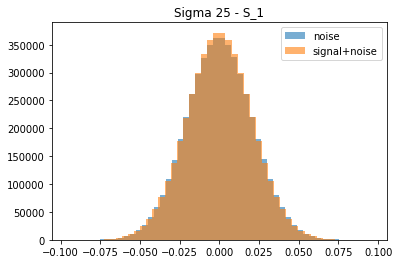

In [70]:
plt.hist(results_n_25, bins=50, alpha=0.6, label="noise")
plt.hist(results_s_25, bins=50, alpha=0.6, label = "signal+noise")
plt.title("Sigma 25 - S_1")
plt.legend()
plt.show()
plt.close()


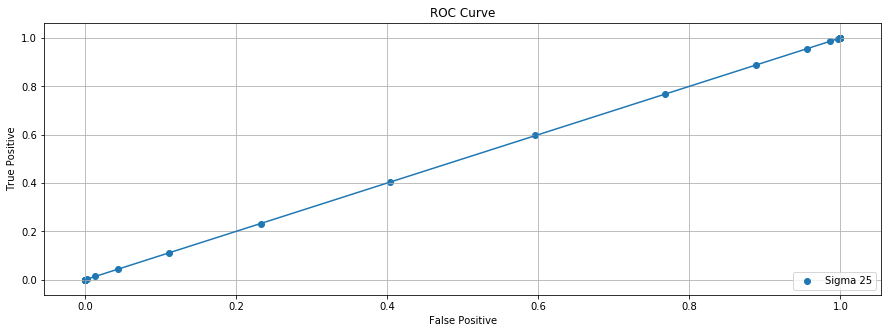

In [71]:
FP_25 = []
TP_25 = []

for t in np.linspace(-1,1,200):
    FP_25 = np.append(FP_25,len(np.where(results_n_25 >= t)[0])/len(results_n_25))
    TP_25 = np.append(TP_25,len(np.where(results_s_25 >= t)[0])/len(results_s_25))

plt.figure(figsize= (15,5))
plt.scatter(FP_25,TP_25,label="Sigma 25")   
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1])
plt.grid()
plt.show()
plt.close()

In [57]:
def search_best_parameter(iFile, oFile, mode):          
    nfrq = 1000
    nphi = 100
    #freq = np.linspace(0.01, 1000.0, nfrq)
    #phi = np.linspace(0, 2*np.pi, nphi)

    #with open(f"{data_dir}/tbank.csv", "w") as file:
        #for i in range(nfrq):
            #for j in range(nphi):
                #file.write("{0} {1}\n".format(freq[i], phi[j]))
                
    #prober(inputFile=iFile, outputFile=oFile, template="tbank.csv", mod=mode)
    
    data = np.loadtxt(os.path.join(data_dir, oFile))
    dataPath = os.path.join(data_dir, oFile)
   
    plt.figure(figsize=(15,4))

    if mode == 3:
        plt.plot(data[:,0],data[:,2])
    else:
        f = data[:,0]
        p = data[:,1]
        S = data[:,2]
        S = np.reshape(S, (nfrq,nphi))
        f = np.reshape(f, (nfrq,nphi))
        p = np.reshape(p, (nfrq,nphi))
        plt.contourf(f,p,S)
        plt.colorbar(label="Prober Output")
    
    #S_2 searching for the minimum value
    if mode == 2:
        plt.scatter(data[np.argmin(data[:,2])][0], data[np.argmin(data[:,2])][1], marker="o", label="Loudest point")
        best = np.where(data[:,2] == np.min(data[:,2]))
        frequency = data[:,0][best][0]
        fmin = frequency - 5.0
        fmax = frequency + 5.0
        plt.xlim([fmin,fmax])
        print("Minimum value is at f = {0:.3f}Hz".format(data[:,0][best][0]))
        print("Minimum value is at phi = {0:.3f}".format(data[:,1][best][0]))
        print("Minimum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
    #S_1 searching for maximum value
    else:
        best = np.where(data[:,2] == np.max(data[:,2]))
        frequency = data[:,0][best][0]
        fmin = frequency - 5.0
        fmax = frequency + 5.0
        plt.scatter(data[np.argmax(data[:,2])][0], data[np.argmax(data[:,2])][1], marker="o", label="Loudest point")
        plt.xlim([fmin,fmax])
        print("Maximum value is at f = {0:.3f}Hz".format(data[:,0][best][0]))
        print("Maximum value is at phi = {0:.3f}".format(data[:,1][best][0]))
        print("Maximum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
        
    plt.title(f"Searching over frequency and phase\n({oFile})")
    plt.savefig(dataPath.replace('.csv', '.jpg'))
    plt.legend(loc='best')
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Phase")
    plt.show()
    plt.close()
        

Maximum value is at f = 57.958Hz
Maximum value is at phi = 3.681
Maximum Value       = 0.090 (0.08982260)


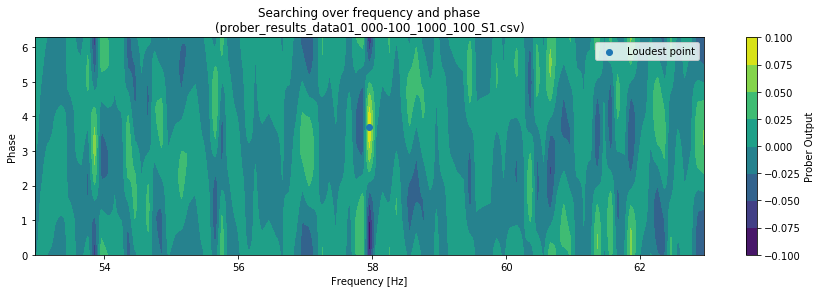

Maximum value is at f = 169.670Hz
Maximum value is at phi = 3.300
Maximum Value       = 0.084 (0.08356840)


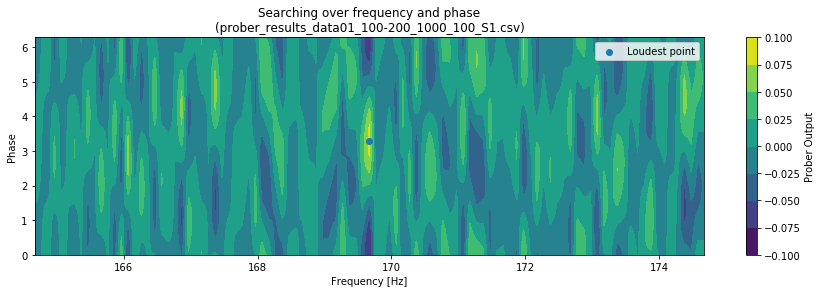

Maximum value is at f = 241.241Hz
Maximum value is at phi = 2.285
Maximum Value       = 0.076 (0.07565590)


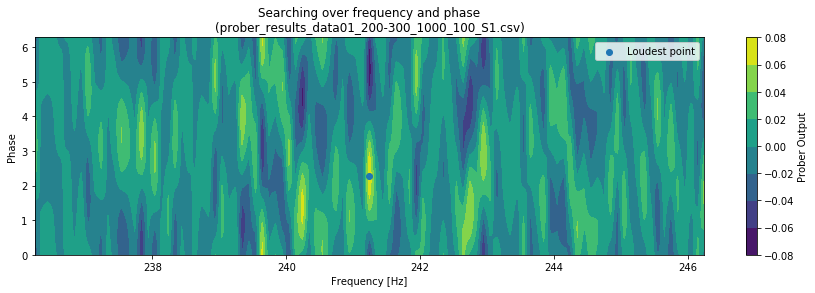

Maximum value is at f = 320.521Hz
Maximum value is at phi = 6.220
Maximum Value       = 0.079 (0.07940130)


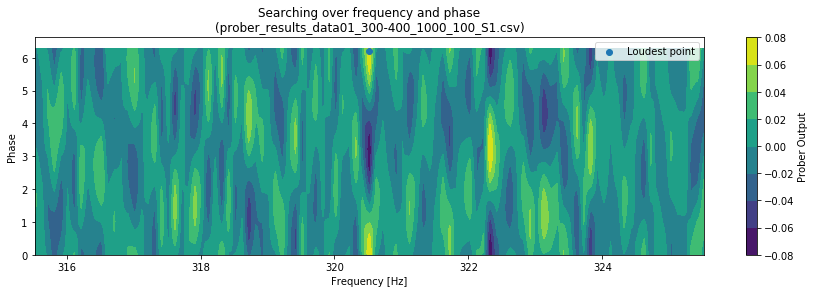

Maximum value is at f = 433.233Hz
Maximum value is at phi = 3.237
Maximum Value       = 0.070 (0.07042620)


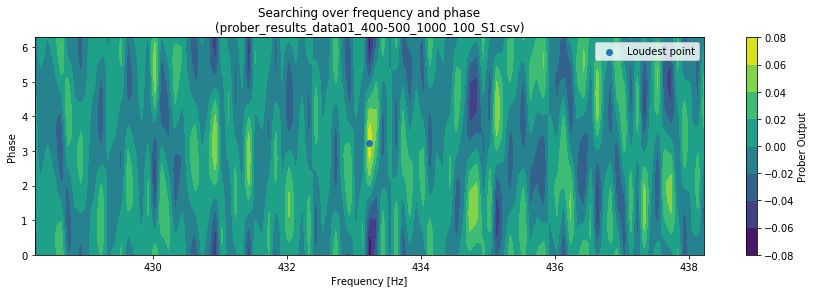

Maximum value is at f = 593.994Hz
Maximum value is at phi = 3.491
Maximum Value       = 0.082 (0.08160630)


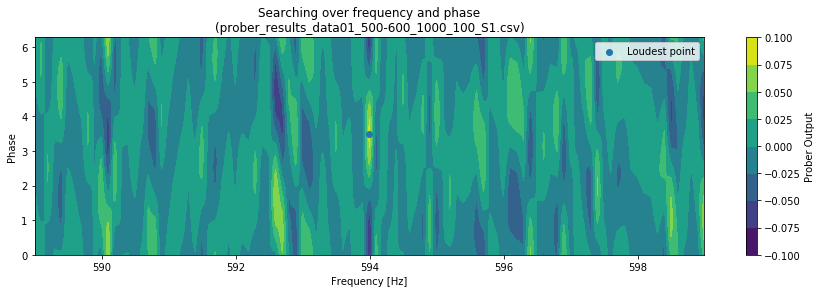

Maximum value is at f = 632.232Hz
Maximum value is at phi = 4.252
Maximum Value       = 0.071 (0.07101100)


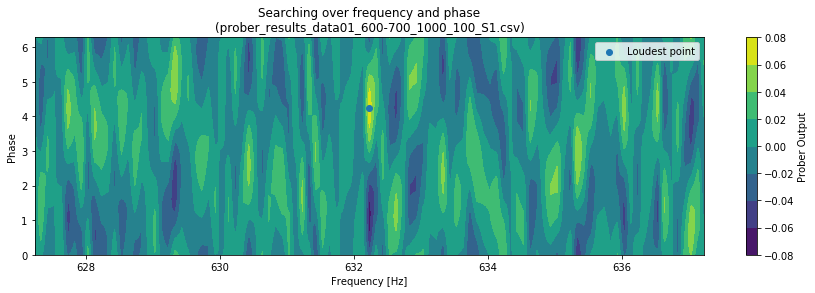

Maximum value is at f = 752.553Hz
Maximum value is at phi = 2.919
Maximum Value       = 0.077 (0.07659310)


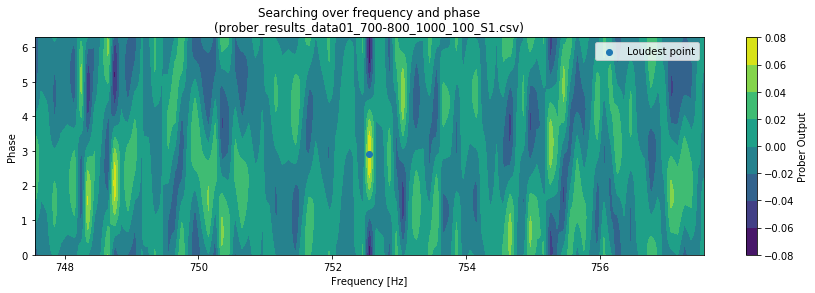

Maximum value is at f = 811.011Hz
Maximum value is at phi = 1.714
Maximum Value       = 0.076 (0.07577890)


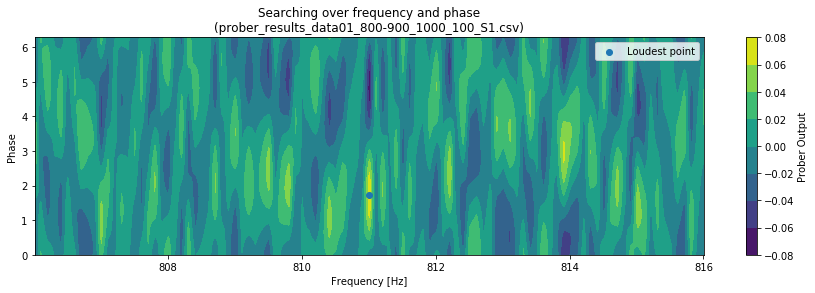

Maximum value is at f = 927.027Hz
Maximum value is at phi = 1.777
Maximum Value       = 0.079 (0.07876500)


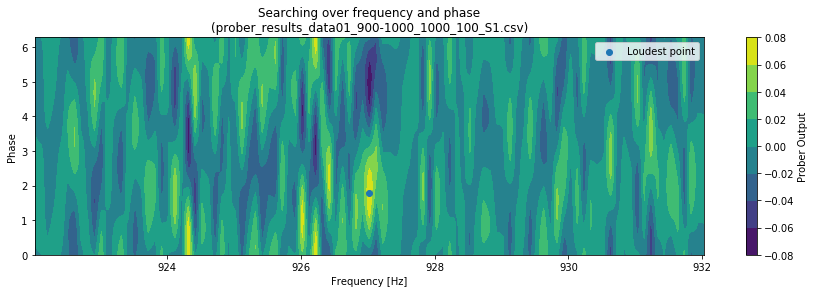

Maximum value is at f = 40.340Hz
Maximum value is at phi = 5.775
Maximum Value       = 0.082 (0.08178950)


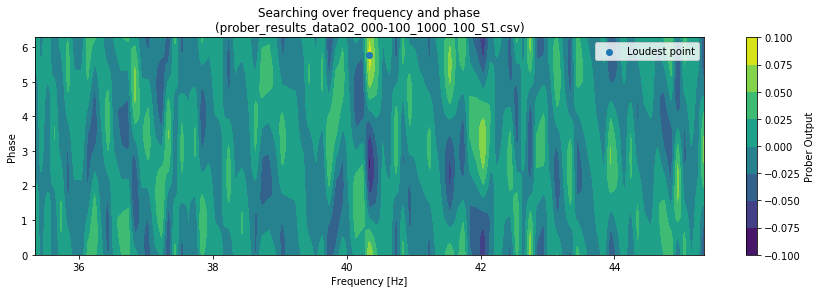

Maximum value is at f = 113.914Hz
Maximum value is at phi = 0.000
Maximum Value       = 0.082 (0.08185850)


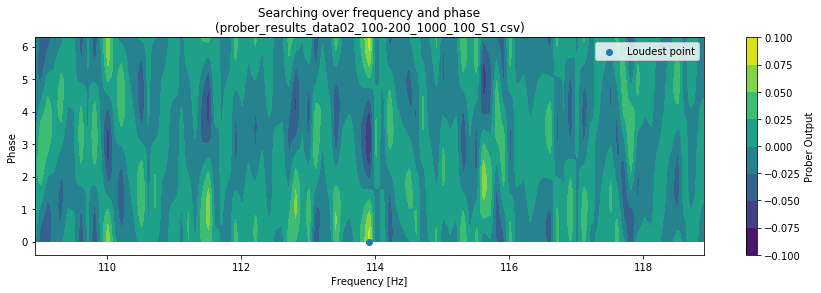

Maximum value is at f = 258.959Hz
Maximum value is at phi = 2.094
Maximum Value       = 0.082 (0.08193800)


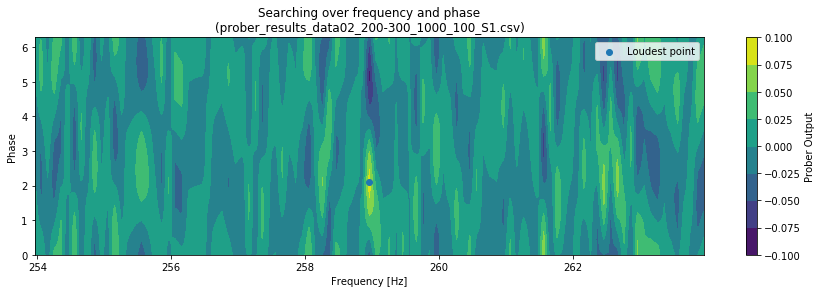

Maximum value is at f = 375.375Hz
Maximum value is at phi = 4.443
Maximum Value       = 0.075 (0.07480060)


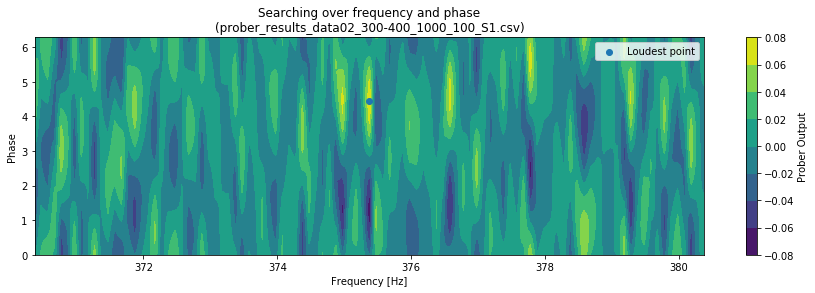

Maximum value is at f = 473.173Hz
Maximum value is at phi = 5.649
Maximum Value       = 0.070 (0.06998620)


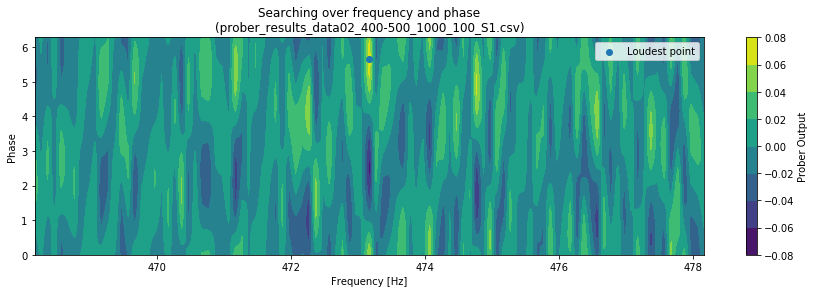

Maximum value is at f = 558.158Hz
Maximum value is at phi = 2.412
Maximum Value       = 0.080 (0.07955710)


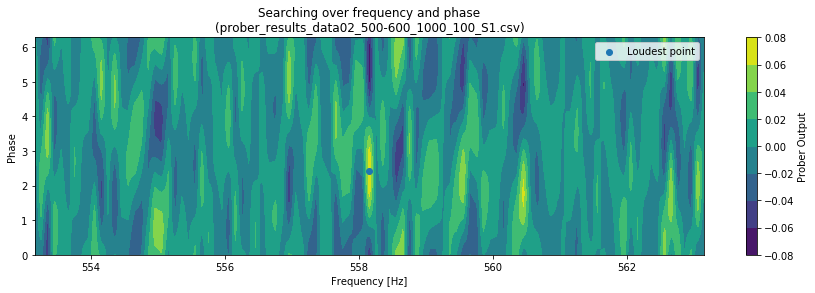

Maximum value is at f = 646.446Hz
Maximum value is at phi = 5.395
Maximum Value       = 0.075 (0.07511820)


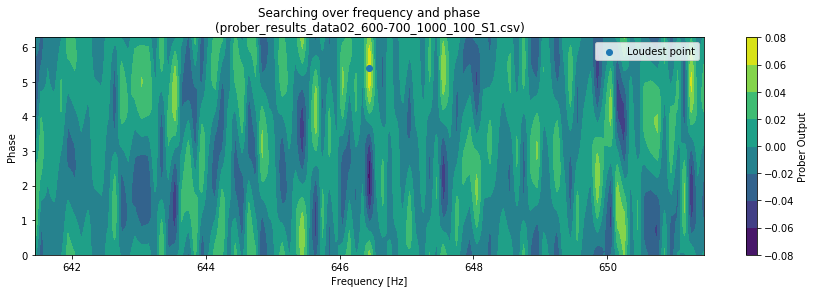

Maximum value is at f = 742.843Hz
Maximum value is at phi = 0.381
Maximum Value       = 0.066 (0.06584480)


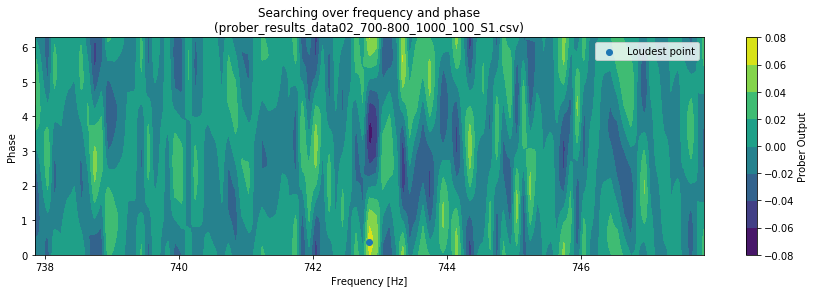

Maximum value is at f = 892.693Hz
Maximum value is at phi = 3.681
Maximum Value       = 0.083 (0.08288820)


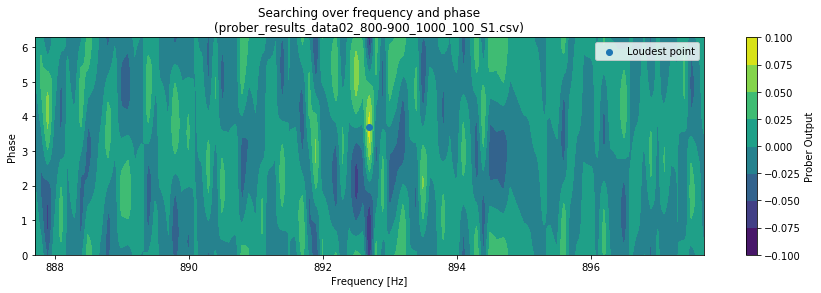

Maximum value is at f = 908.208Hz
Maximum value is at phi = 4.379
Maximum Value       = 0.079 (0.07929210)


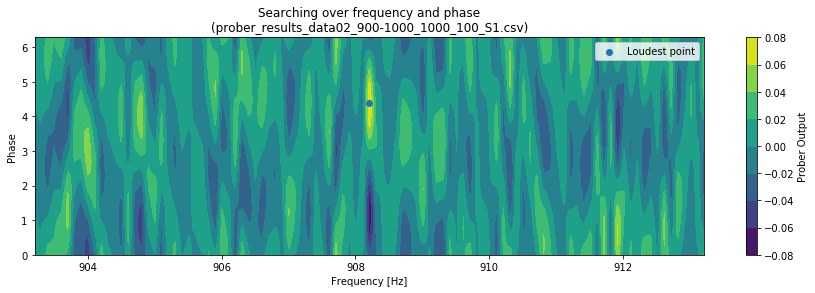

Maximum value is at f = 95.796Hz
Maximum value is at phi = 4.062
Maximum Value       = 0.076 (0.07588300)


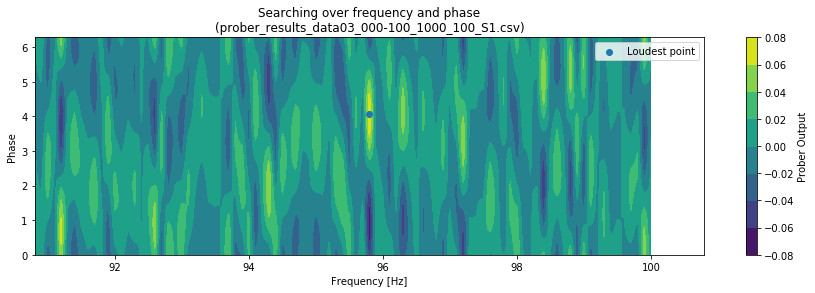

Maximum value is at f = 138.639Hz
Maximum value is at phi = 2.348
Maximum Value       = 0.072 (0.07165110)


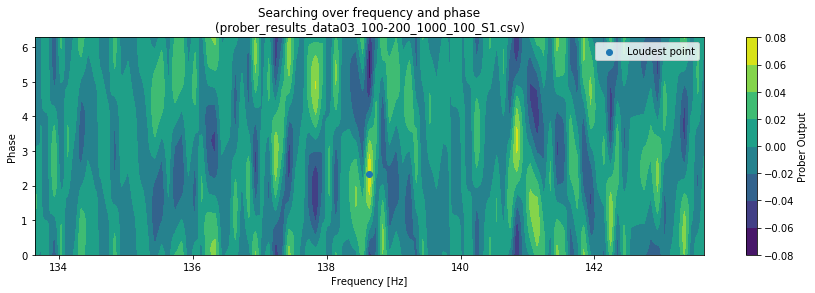

Maximum value is at f = 288.889Hz
Maximum value is at phi = 4.570
Maximum Value       = 0.084 (0.08443540)


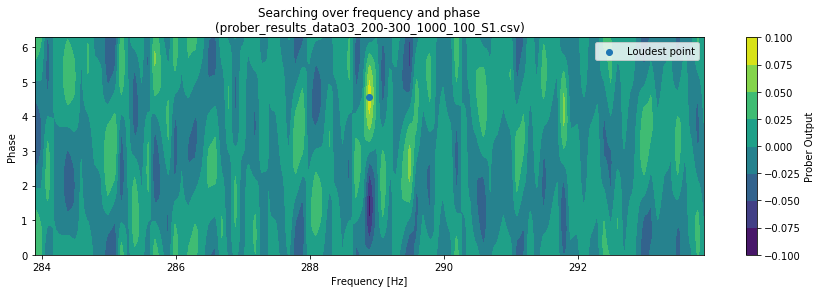

Maximum value is at f = 340.641Hz
Maximum value is at phi = 4.252
Maximum Value       = 0.076 (0.07572200)


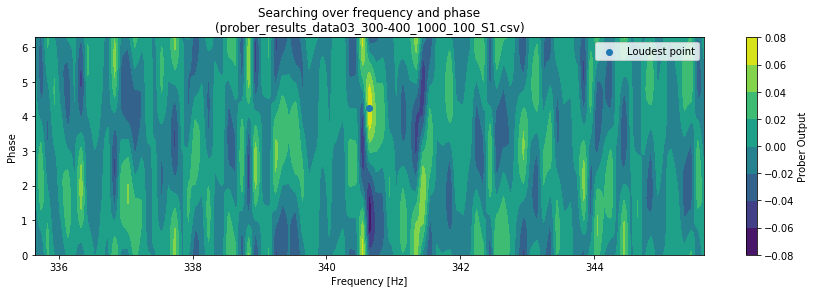

Maximum value is at f = 473.073Hz
Maximum value is at phi = 6.220
Maximum Value       = 0.076 (0.07584260)


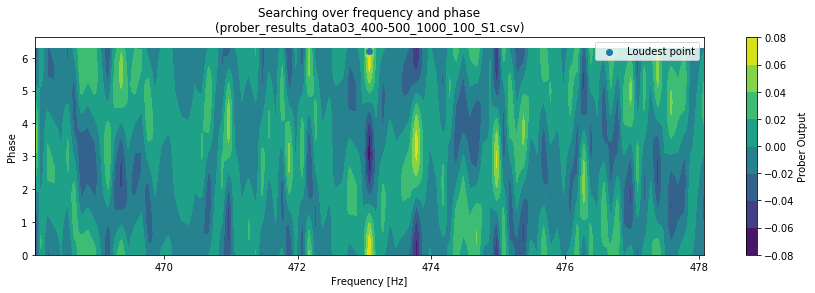

Maximum value is at f = 573.173Hz
Maximum value is at phi = 1.460
Maximum Value       = 0.076 (0.07634000)


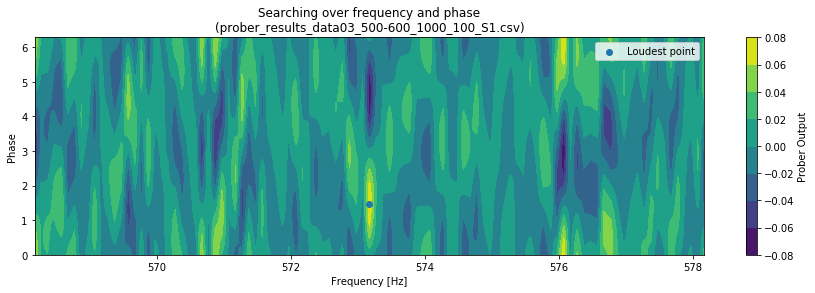

Maximum value is at f = 685.986Hz
Maximum value is at phi = 3.871
Maximum Value       = 0.084 (0.08390160)


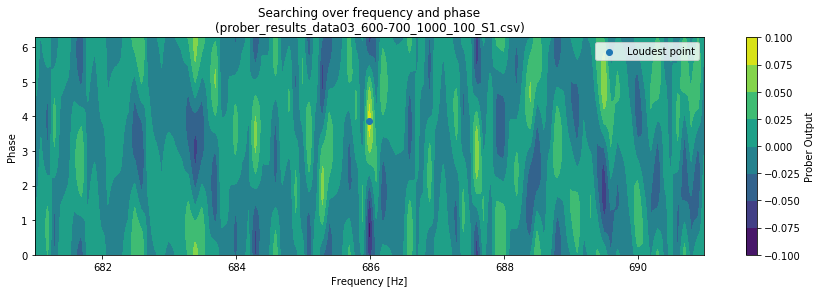

Maximum value is at f = 786.687Hz
Maximum value is at phi = 4.823
Maximum Value       = 0.074 (0.07376320)


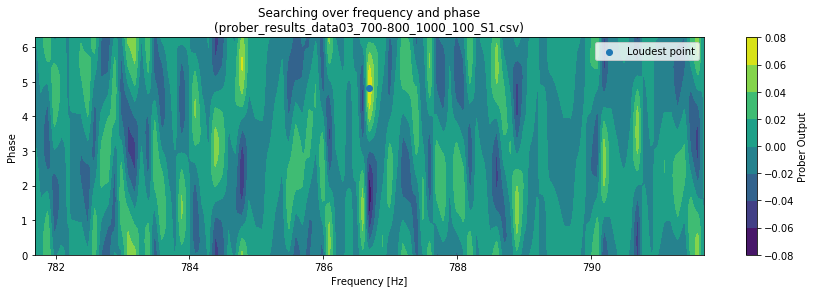

Maximum value is at f = 843.143Hz
Maximum value is at phi = 2.729
Maximum Value       = 0.073 (0.07330170)


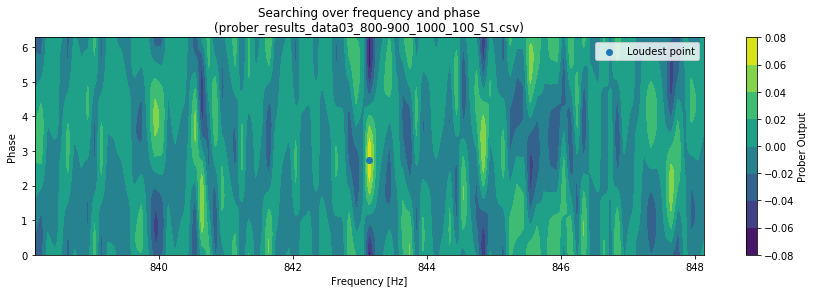

Maximum value is at f = 911.211Hz
Maximum value is at phi = 5.331
Maximum Value       = 0.084 (0.08426830)


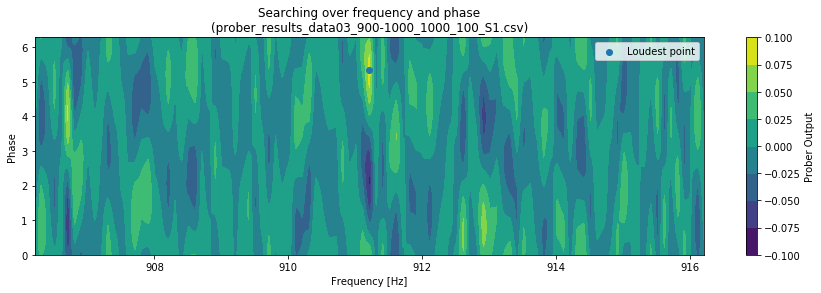

Maximum value is at f = 7.608Hz
Maximum value is at phi = 2.475
Maximum Value       = 0.081 (0.08051940)


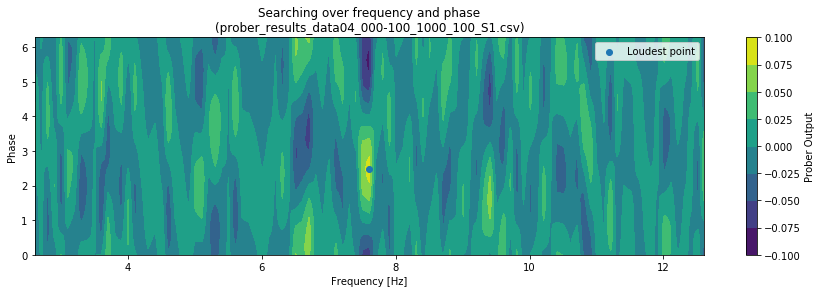

Maximum value is at f = 164.865Hz
Maximum value is at phi = 0.635
Maximum Value       = 0.082 (0.08175650)


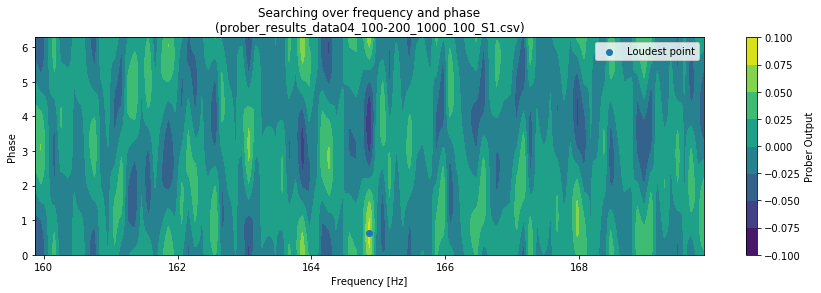

Maximum value is at f = 238.539Hz
Maximum value is at phi = 0.063
Maximum Value       = 0.073 (0.07324370)


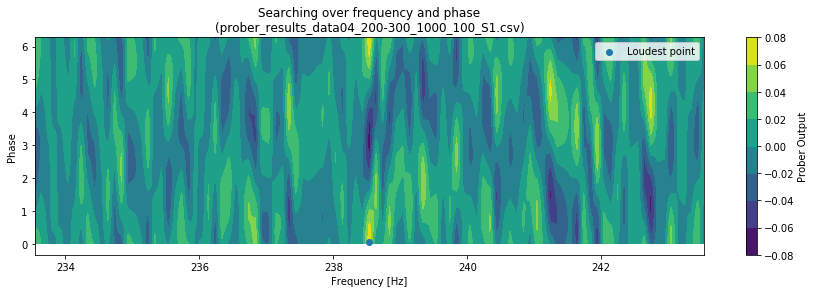

Maximum value is at f = 310.711Hz
Maximum value is at phi = 3.745
Maximum Value       = 0.074 (0.07446710)


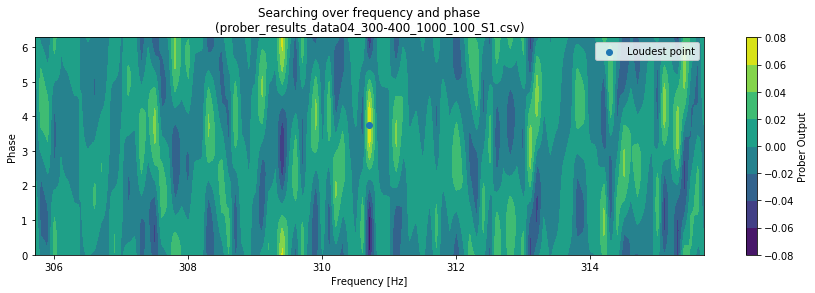

Maximum value is at f = 464.064Hz
Maximum value is at phi = 1.587
Maximum Value       = 0.081 (0.08148140)


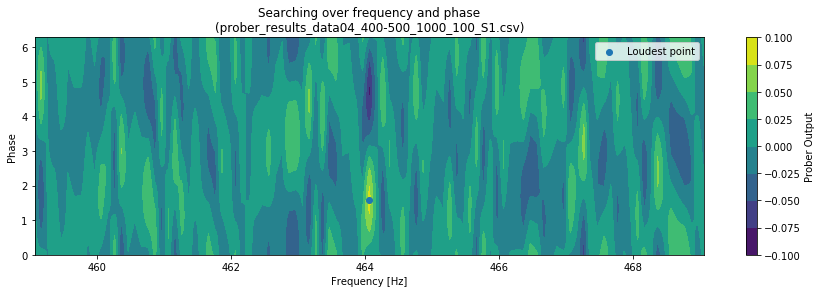

Maximum value is at f = 586.987Hz
Maximum value is at phi = 4.379
Maximum Value       = 0.076 (0.07632070)


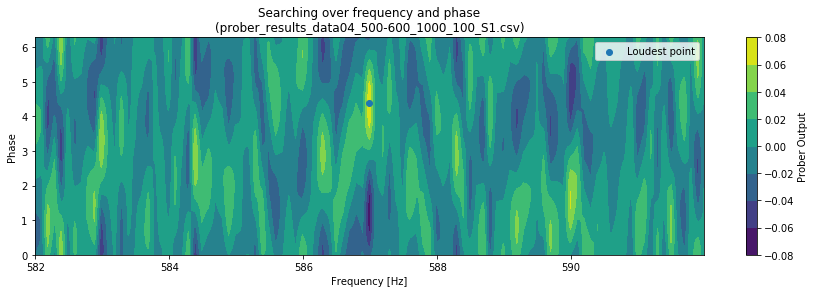

Maximum value is at f = 687.087Hz
Maximum value is at phi = 2.729
Maximum Value       = 0.075 (0.07491710)


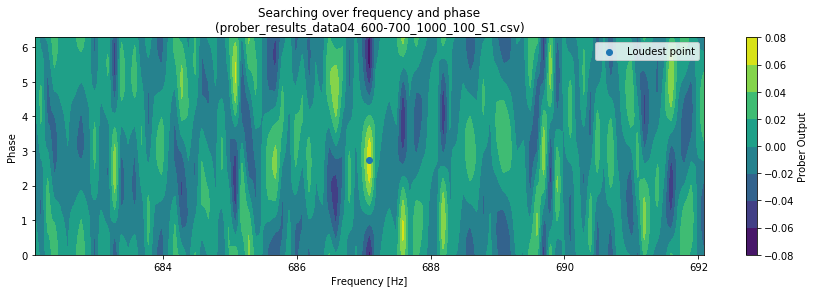

Maximum value is at f = 778.378Hz
Maximum value is at phi = 3.491
Maximum Value       = 0.071 (0.07109800)


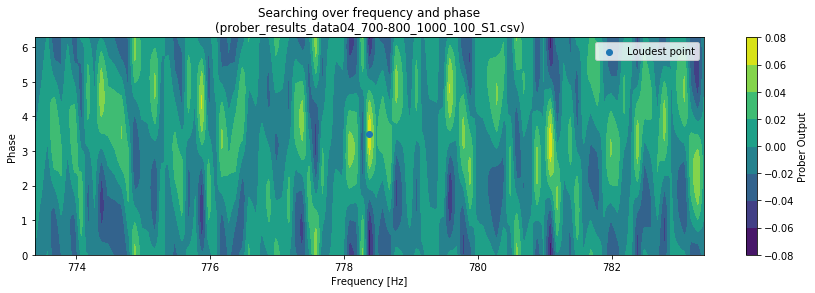

Maximum value is at f = 847.347Hz
Maximum value is at phi = 4.443
Maximum Value       = 0.087 (0.08721730)


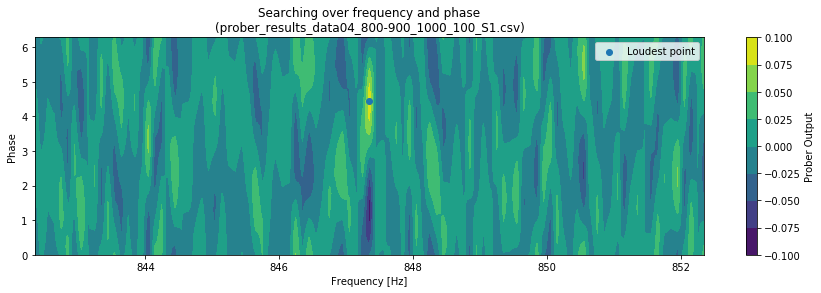

Maximum value is at f = 981.982Hz
Maximum value is at phi = 5.458
Maximum Value       = 0.096 (0.09580840)


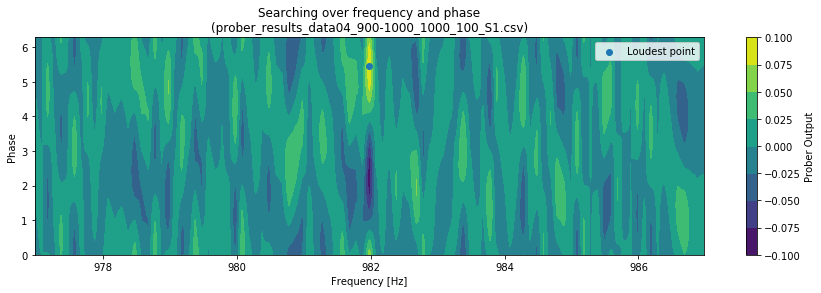

Maximum value is at f = 23.123Hz
Maximum value is at phi = 5.839
Maximum Value       = 0.084 (0.08388500)


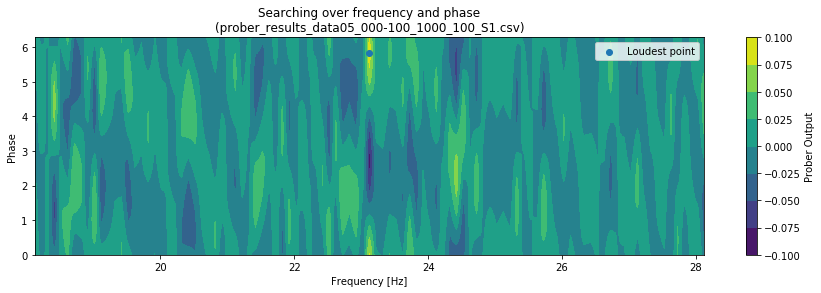

Maximum value is at f = 176.777Hz
Maximum value is at phi = 3.618
Maximum Value       = 0.088 (0.08778550)


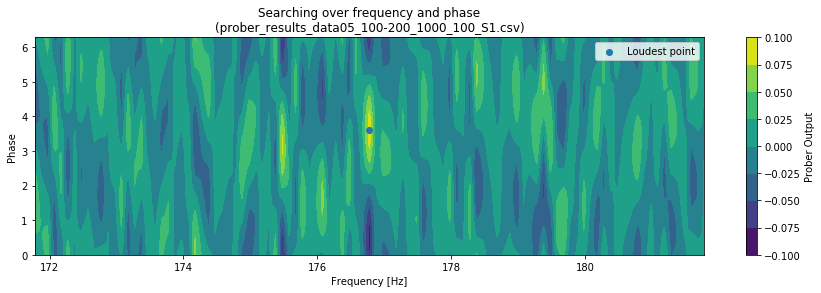

Maximum value is at f = 288.989Hz
Maximum value is at phi = 5.712
Maximum Value       = 0.073 (0.07295380)


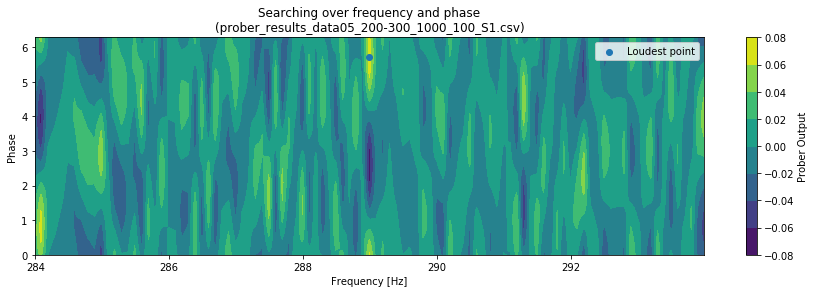

Maximum value is at f = 356.757Hz
Maximum value is at phi = 1.079
Maximum Value       = 0.078 (0.07824980)


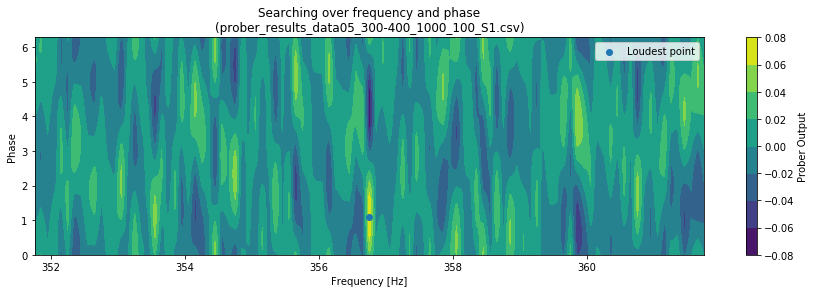

Maximum value is at f = 440.040Hz
Maximum value is at phi = 4.633
Maximum Value       = 0.093 (0.09285120)


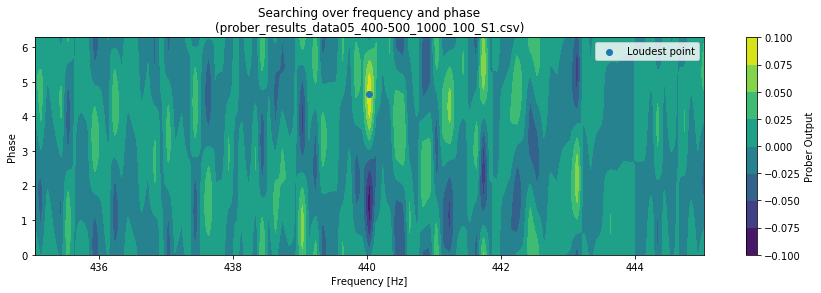

Maximum value is at f = 598.999Hz
Maximum value is at phi = 1.079
Maximum Value       = 0.076 (0.07644590)


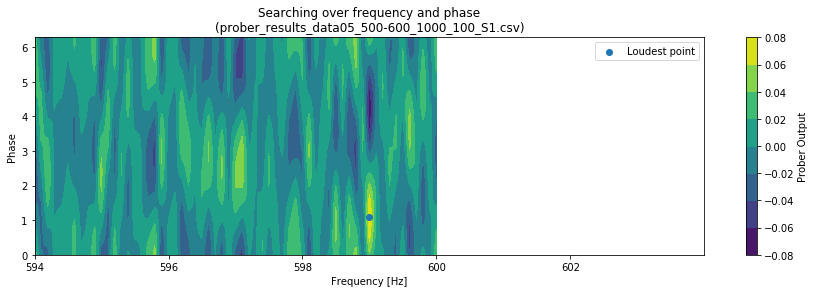

Maximum value is at f = 623.023Hz
Maximum value is at phi = 5.141
Maximum Value       = 0.076 (0.07553660)


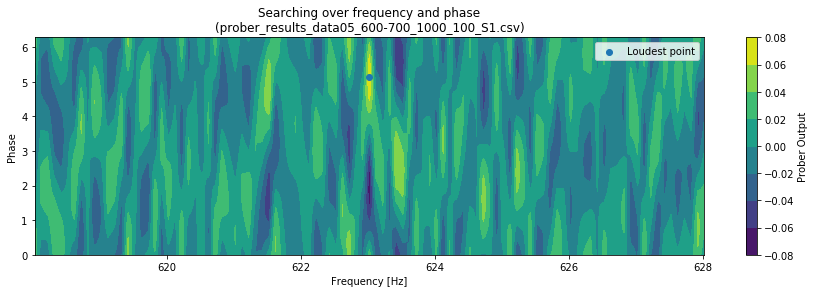

Maximum value is at f = 791.291Hz
Maximum value is at phi = 4.506
Maximum Value       = 0.087 (0.08747210)


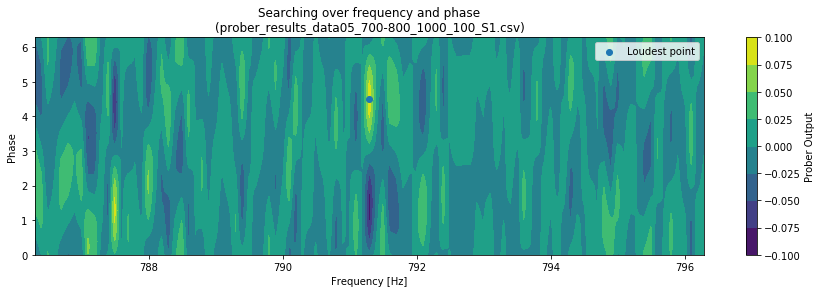

Maximum value is at f = 827.427Hz
Maximum value is at phi = 3.046
Maximum Value       = 0.094 (0.09352210)


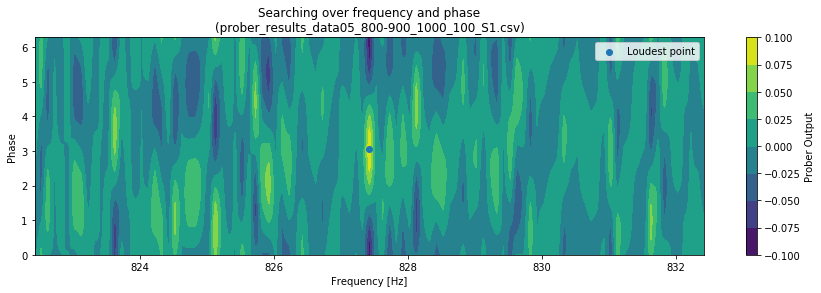

Maximum value is at f = 961.662Hz
Maximum value is at phi = 4.252
Maximum Value       = 0.081 (0.08066710)


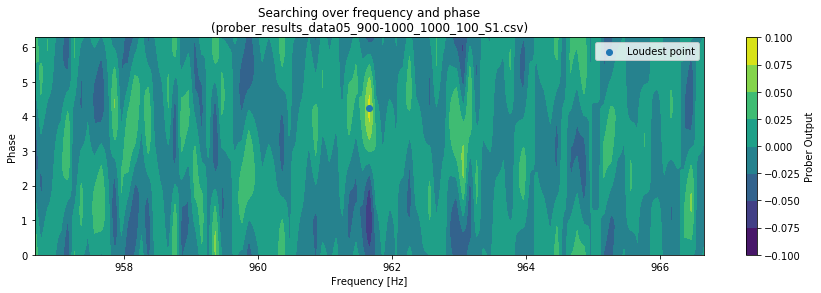

In [65]:
for i in range(1,6):
    for k in range(10):
        search_best_parameter(iFile=f"data_01.csv", oFile=f"prober_results_data0{i}_{k}00-{k+1}00_1000_100_S1.csv", mode=1)